# HR Analytics Project- Understanding the Attrition in HR 
By Mónica Atiaga

Batch - DSNB1222
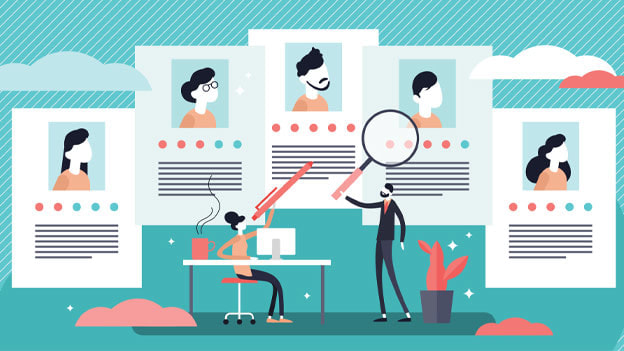

## Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Dataset Link
*	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

#### Custom functions

In [2]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

### Load the dataset

In [3]:
# Open the zip file
zf = zipfile.ZipFile("datasets/ibm-hr-analytics-employee-attrition-performance.zip") 

# Extract the csv file
df = pd.read_csv(zf.open('WA_Fn-UseC_-HR-Employee-Attrition.csv'))
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [4]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset:\n {df.columns.to_list()}")

The rows and columns in the dataset: (1470, 35)

The column headers in the dataset:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


The dataset contains 1470 rows and 35 columns. Out of which 1 is the target variable "Attrition" and the remaining 34 are independent variables described as follows:

- Age: Employee age
- Attrition : Employee leaving the company (0=No, 1=Yes)
- BusinessTravel : (1=Non-Travel, 2=Travel_Frequently, 3=Travel_Rarely)
- DailyRate : Numerical Value - Salary Level
- Department : (1=Human Resources, 2=Research & Development, 3=Sales)
- DistanceFromHome : Numerical Value - THE DISTANCE FROM WORK TO HOME
- Education : Numerical Value 
    - 1 'Below College'
    - 2 'College'
    - 3 'Bachelor'
    - 4 'Master'
    - 5 'Doctor'
- EducationField : (1=Human Resources, 2=Life Sciences, 3=Marketing, 4=Medical, 5=Other, 6=Technical Degree)
- EmployeeCount : Numerical Value
- EmployeeNumber : EMPLOYEE ID
- EnvironmentSatisfaction : Numerical Value - SATISFACTION WITH THE ENVIROMENT
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'
- Gender : (1=Female, 2=Male)
- HourlyRate : Numerical Value - HOURLY SALARY
- JobInvolvement : Numerical Value - JOB INVOLVEMENT
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'
- JobLevel : Numerical Value - LEVEL OF JOB
- JobRole : (1=Healthcare Representative, 2=Human Resources, 3=Laboratory Technician, 4=Manager, 5=Manufacturing Director, 6=Research Director, 7= Research Scientist, 8=Sales Executive, 9=Sales Representative)
- JobSatisfaction : Numerical Value - SATISFACTION WITH THE JOB **(same as JobInvolvement)**
- MaritalStatus : (1=Divorced, 2=Married, 3=Single)
- MonthlyIncome : Numerical Value - MONTHLY SALARY
- MonthlyRate : Numerical Value - MONTHY RATE
- NumCompaniesWorked : Numerical Value - NO. OF COMPANIES WORKED AT
- Over18 : (1=Yes, 2=No)
- OverTime : (1=No, 2=Yes)
- PercentSalaryHike : Numerical Value - PERCENTAGE INCREASE IN SALARY
- PerformanceRating : Numerical Value - ERFORMANCE RATING
    - 1 'Low'
    - 2 'Good'
    - 3 'Excellent'
    - 4 'Outstanding'
- RelationshipSatisfaction : Numerical Value - RELATIONS SATISFACTION **(same as JobInvolvement)**
- StandardHours : Numerical Value - STANDARD HOURS
- StockOptionLevel : Numerical Value - STOCK OPTIONS
- TotalWorkingYears : Numerical Value - TOTAL YEARS WORKED
- TrainingTimesLastYear : Numerical Value - HOURS SPENT TRAINING
- WorkLifeBalance : Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
    - 1 'Bad'
    - 2 'Good'
    - 3 'Better'
    - 4 'Best'
- YearsAtCompany : Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
- YearsInCurrentRole : Numerical Value -YEARS IN CURRENT ROLE
- YearsSinceLastPromotion : Numerical Value - LAST PROMOTION
- YearsWithCurrManage : Numerical Value - YEARS SPENT WITH CURRENT MANAGER

Ref. https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [5]:
# checking the types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are two types of data (int64 and object ) present in the dataset.
None of the dataset contain null values.

In [6]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: \n {categorical_col}\n")
print(f"Numerical Columns: \n {numerical_col}")

Categorical Columns: 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Numerical Columns: 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


The dataset has 9 categorical columns and the rest are numerical.

## 1.2 Missing values


In [7]:
# checking the null values in the training dataset
missing_val = df.isnull().sum().to_frame("Missing in df")
missing_val

Missing in df
Age                                   0
Attrition                             0
BusinessTravel                        0
DailyRate                             0
Department                            0
DistanceFromHome                      0
Education                             0
EducationField                        0
EmployeeCount                         0
EmployeeNumber                        0
EnvironmentSatisfaction               0
Gender                                0
HourlyRate                            0
JobInvolvement                        0
JobLevel                              0
JobRole                               0
JobSatisfaction                       0
MaritalStatus                         0
MonthlyIncome                         0
MonthlyRate                           0
NumCompaniesWorked                    0
Over18                                0
OverTime                              0
PercentSalaryHike                     0
PerformanceRating                     0
RelationshipSatisfaction              0
StandardHours                         0
StockOptionLevel                      0
TotalWorkingYears                     0
TrainingTimesLastYear                 0
WorkLifeBalance                       0
YearsAtCompany                        0
YearsInCurrentRole                    0
YearsSinceLastPromotion               0
YearsWithCurrManager                  0

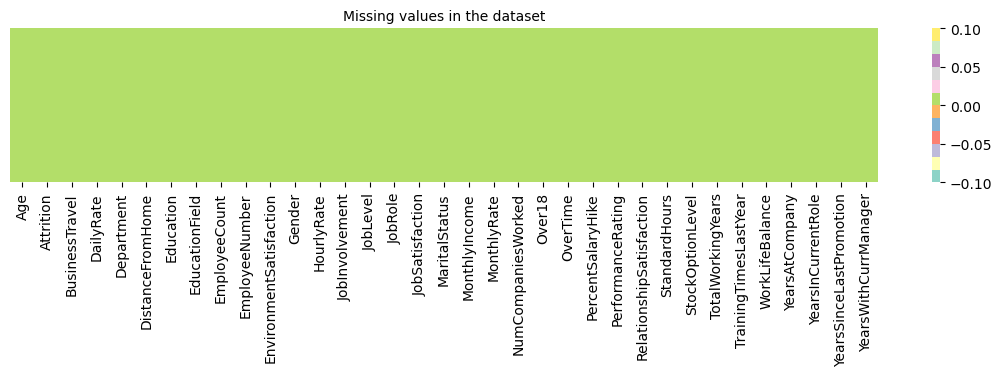

In [8]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);


None of the datasets contain null values.

## 1.3 Features Analysis

### 1.3.1 Unique values

Now, we are going to review the unique values of each column in the dataset in order to understand the data and the features.

In [9]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

No. of Unique values    type
Age                                         43   int64
Attrition                                    2  object
BusinessTravel                               3  object
DailyRate                                  886   int64
Department                                   3  object
DistanceFromHome                            29   int64
Education                                    5   int64
EducationField                               6  object
EmployeeCount                                1   int64
EmployeeNumber                            1470   int64
EnvironmentSatisfaction                      4   int64
Gender                                       2  object
HourlyRate                                  71   int64
JobInvolvement                               4   int64
JobLevel                                     5   int64
JobRole                                      9  object
JobSatisfaction                              4   int64
MaritalStatus                                3  object
MonthlyIncome                             1349   int64
MonthlyRate                               1427   int64
NumCompaniesWorked                          10   int64
Over18                                       1  object
OverTime                                     2  object
PercentSalaryHike                           15   int64
PerformanceRating                            2   int64
RelationshipSatisfaction                     4   int64
StandardHours                                1   int64
StockOptionLevel                             4   int64
TotalWorkingYears                           40   int64
TrainingTimesLastYear                        7   int64
WorkLifeBalance                              4   int64
YearsAtCompany                              37   int64
YearsInCurrentRole                          19   int64
YearsSinceLastPromotion                     16   int64
YearsWithCurrManager                        18   int64

In [10]:
# Checking for columns with one unique value or have the same unique values as rows has the dataset
info_df[(info_df['No. of Unique values'] == 1) | (info_df['No. of Unique values'] == df.shape[0]) ]

No. of Unique values    type
EmployeeCount                      1   int64
EmployeeNumber                  1470   int64
Over18                             1  object
StandardHours                      1   int64

About the number of unique values in the datasets:
- EmployeeNumber column has the same unique values as the dataset rows, this column only serves to identify each record but doesn't influence the target variable. Therefore we can drop it.

- The EmployeeCount, Over18, and StandardHours columns have one unique value for all the records therefore do not contribute to or influence the target variable since all the rows have the same value. These columns can be dropped too.

- The dataset contains the following categorical variables: Attrition(2),  BusinessTravel(3), Department(3), EducationField(6), Gender(2), JobRole(9), MaritalStatus(3), OverTime(2) with its respective unique values.

- The numerical columns in the dataset are: Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager.  

- However, the Education, EnvironmentSatisfaction, JobInvolvement, JobLevel,JobSatisfaction,  NumCompaniesWorked, PerformanceRating,   RelationshipSatisfaction, StockOptionLevel, and WorkLifeBalance columns, despite being numerical, should be analyzed as categorical during EDA.

Next, we will remove the columns EmployeeNumber, EmployeeCount, Over18, and StandardHours for the reasons explained previously.

In [11]:
# Dropping the columns EmployeeNumber, EmployeeCount, Over18, and StandardHours
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
display(df.sample(5))

Age Attrition BusinessTravel  DailyRate              Department  \
1147   49        No  Travel_Rarely        722  Research & Development   
1259   30        No  Travel_Rarely        305  Research & Development   
862    44        No     Non-Travel        111  Research & Development   
978    40        No  Travel_Rarely       1202  Research & Development   
371    29        No  Travel_Rarely       1283  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1147                25          4  Life Sciences                        3   
1259                16          3  Life Sciences                        3   
862                 17          3  Life Sciences                        4   
978                  2          1        Medical                        2   
371                 23          3  Life Sciences                        4   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
1147  Female  ...                  3                         4   
1259    Male  ...                  3                         3   
862     Male  ...                  3                         4   
978   Female  ...                  4                         2   
371     Male  ...                  3                         4   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
1147                 1                10                      3   
1259                 1                10                      3   
862                  0                 6                      3   
978                  3                15                      0   
371                  0                 6                      4   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1147               2               9                   6   
1259               3               7                   0   
862                3               0                   0   
978                3              12                  11   
371                3               3                   2   

      YearsSinceLastPromotion YearsWithCurrManager  
1147                        1                    4  
1259                        1                    7  
862                         0                    0  
978                        11                    8  
371                         1                    2  

[5 rows x 31 columns]

In [12]:
# checking the new dimension of the dataset
print(f"The rows and columns in the dataset: {df.shape}")

The rows and columns in the dataset: (1470, 31)


Now the dataset contains 1470 rows and 31 columns. The target variable and 30 independent variables.

#### 1.3.1.1 Attrition unique values


In [13]:
# Checking the target variable
df['Attrition'].value_counts().to_frame()

Attrition
No        1233
Yes        237

The target variable has two unique values: yes or no.

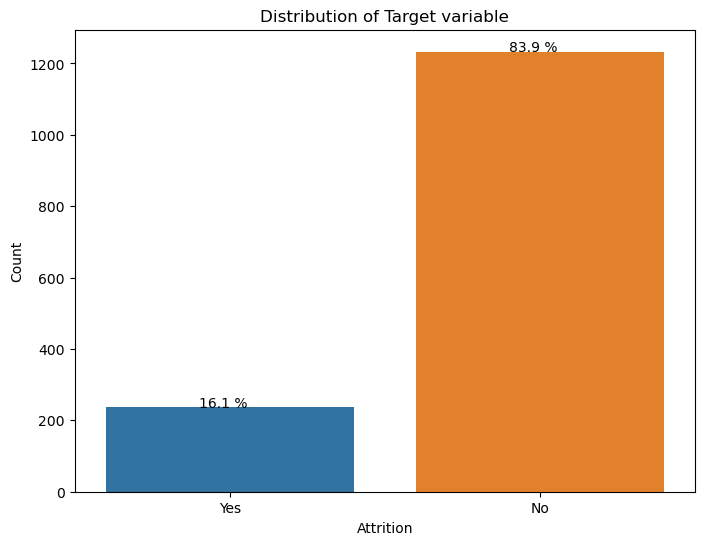

In [14]:
# Visualize the distribution of Attrition
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Attrition')
show_percentage(ax, len(df))
plt.title('Distribution of Target variable')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

And we can observe the dataset is imbalanced. There are significantly more records(1233) for "NO" compared to 237 for "Yes". Later we will rectify it by using the oversampling method in the later part.

#### 1.3.1.2 Categorical variables unique values


We are going to separate the categorical columns from the numerical columns again because we eliminated some columns from the dataset.

In [15]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

num_cat_col = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
print(f"Numerical Columns that represent a category:\n {num_cat_col}\n")


Categorical Columns:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Numerical Columns:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Numerical Columns that represent a category:
 ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']



In [16]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}:\n {df[col].value_counts()}\n")

1.BusinessTravel:
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

2.Department:
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

3.EducationField:
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

4.Gender:
 Male      882
Female    588
Name: Gender, dtype: int64

5.JobRole:
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

6.MaritalStatus:
 Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

7.OverTime:
 No     1054


These are the unique values for the categorical independent variables.

In [17]:
# Checking the value counts of the Numerical Columns that represent a category:
for i, col in enumerate(num_cat_col):
    print(f"{i+1}.{col}:\n {df[col].value_counts()}\n")

1.Education:
 3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

2.EnvironmentSatisfaction:
 3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

3.JobInvolvement:
 3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

4.JobLevel:
 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

5.JobSatisfaction:
 4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

6.NumCompaniesWorked:
 1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

7.PerformanceRating:
 3    1244
4     226
Name: PerformanceRating, dtype: int64

8.RelationshipSatisfaction:
 3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

9.StockOptionLevel:
 0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

10.WorkLifeBalance:
 3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: in

These are the unique values for Numerical columns that represent a category

#### 1.3.1.3 Numerical variables unique values


In [18]:
# Select the rest of the numerical columns
num_col = [col for col in numerical_col if col not in num_cat_col]
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(num_col):
    print(f"{i+1}.{col}:\n {df[col].value_counts()}\n")

1.Age:
 35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

2.DailyRate:
 691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

3.DistanceFromHome:
 2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

4.HourlyRate:
 66    29
98    28
42    28
48    28
84    28
   

These are the unique values for the numerical independent variables.

### 1.3.2 Summary statistics of the numerical variables


In [20]:
# Summary statistics of numerical columns
stats = df.describe()

# First 9 columns
display(stats.iloc[:,:9])

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  
count      1470.000000  
mean          2.728571  
std           1.102846  
min           1.000000  
25%           2.000000  
50%           3.000000  
75%           4.000000  
max           4.000000

In [21]:
# Next 7 columns
display(stats.iloc[:,9:16])

MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
count    1470.000000   1470.000000         1470.000000        1470.000000   
mean     6502.931293  14313.103401            2.693197          15.209524   
std      4707.956783   7117.786044            2.498009           3.659938   
min      1009.000000   2094.000000            0.000000          11.000000   
25%      2911.000000   8047.000000            1.000000          12.000000   
50%      4919.000000  14235.500000            2.000000          14.000000   
75%      8379.000000  20461.500000            4.000000          18.000000   
max     19999.000000  26999.000000            9.000000          25.000000   

       PerformanceRating  RelationshipSatisfaction  StockOptionLevel  
count        1470.000000               1470.000000       1470.000000  
mean            3.153741                  2.712245          0.793878  
std             0.360824                  1.081209          0.852077  
min             3.000000                  1.000000          0.000000  
25%             3.000000                  2.000000          0.000000  
50%             3.000000                  3.000000          1.000000  
75%             3.000000                  4.000000          1.000000  
max             4.000000                  4.000000          3.000000

In [22]:
# Last columns
display(stats.iloc[:,16:])

TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1470.000000  
mean               4.123129  
std                3.568136  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

In [23]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

MonthlyIncome               1583.931293
MonthlyRate                   77.603401
DistanceFromHome               2.192517
YearsAtCompany                 2.008163
TotalWorkingYears              1.279592
YearsInCurrentRole             1.229252
PercentSalaryHike              1.209524
YearsSinceLastPromotion        1.187755
YearsWithCurrManager           1.123129
Age                            0.923810
NumCompaniesWorked             0.693197
DailyRate                      0.485714
PerformanceRating              0.153741
JobLevel                       0.063946
Education                     -0.087075
HourlyRate                    -0.108844
TrainingTimesLastYear         -0.200680
StockOptionLevel              -0.206122
WorkLifeBalance               -0.238776
JobInvolvement                -0.270068
JobSatisfaction               -0.271429
EnvironmentSatisfaction       -0.278231
RelationshipSatisfaction      -0.287755
dtype: float64

In [24]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

MonthlyIncome               4080.155141
YearsAtCompany                20.738786
TotalWorkingYears             13.158845
YearsInCurrentRole             6.524474
YearsSinceLastPromotion        6.367384
YearsWithCurrManager           5.740599
Age                            4.805443
DistanceFromHome               3.593754
PercentSalaryHike              2.470601
NumCompaniesWorked             1.310785
JobLevel                       0.722175
TrainingTimesLastYear          0.622139
StockOptionLevel               0.501969
PerformanceRating              0.124611
Education                      0.038745
JobInvolvement                -0.153054
WorkLifeBalance               -0.174176
RelationshipSatisfaction      -0.874663
EnvironmentSatisfaction       -0.907933
JobSatisfaction               -0.934264
HourlyRate                    -6.550012
DailyRate                   -110.503914
MonthlyRate                -1549.675489
dtype: float64

**Observations:**

- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no missing values in the dataset.
- The dependent variable {Attrition} is categorical with two unique values yes/no.
- The mean value is larger than the median(50%) in columns {MonthlyIncome, MonthlyRate, DistanceFromHome, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole, PercentSalaryHike, YearsSinceLastPromotion, YearsWithCurrManager, Age, NumCompaniesWorked, DailyRate, PerformanceRating, JobLevel}, which means the data could be skewed to the right in these columns.
- The data in the columns {RelationshipSatisfaction, EnvironmentSatisfaction, JobSatisfaction, JobInvolvement, WorkLifeBalance, StockOptionLevel, TrainingTimesLastYear, HourlyRate, Education} have a small difference between the mean value less than the median which means the data probably is skewed to the left.
- The dataset could present outliers in the columns {MonthlyIncome, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Age, DistanceFromHome, PercentSalaryHike, NumCompaniesWorked}, however in the univariate analysis of each feature we will verify it.
- The features are not on the same scale. Features should be on the same scale for algorithms such as logistic regression to converge smoothly.

In [25]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus OverTime  
count              1470          1470     1470  
unique                9             3        2  
top     Sales Executive       Married       No  
freq                326           673     1054

Here we can see the number of unique values for each categorical variable as well as the most frequent value.

### 1.3.3 Duplicates

In [26]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 31)

The dataset does not have duplicate values.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Target feature

In [27]:
# Distribution of Attrition
df['Attrition'].value_counts().to_frame()

Attrition
No        1233
Yes        237

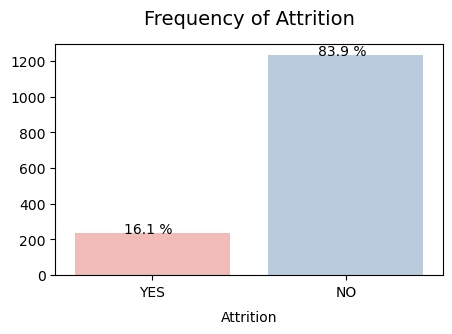

In [28]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Attrition
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('Attrition', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['YES', 'NO'], size=10)
plt.title(f"Frequency of Attrition", size=14, y=1.05);

1233 (83.9%) records as "no" and only 237 (16.1%) records as "yes" of the total dataset. The target variable is imbalanced.

#### 1.4.1.2 Categorical columns

In [29]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}")

1.BusinessTravel
2.Department
3.EducationField
4.Gender
5.JobRole
6.MaritalStatus
7.OverTime


BusinessTravel
Travel_Rarely            0.709524
Travel_Frequently        0.188435
Non-Travel               0.102041

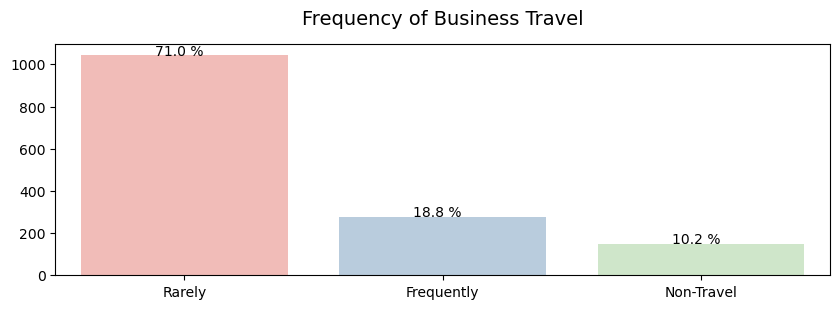

In [30]:
# Visualize the frequency of BusinessTravel(1)
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='BusinessTravel', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['Rarely', 'Frequently', 'Non-Travel'], size=10)
plt.title(f"Frequency of Business Travel", size=14, y=1.05)

df['BusinessTravel'].value_counts(normalize=True).to_frame()

71.0% travel rarely, 18.8% travel frequently, and the rest 10.2% no travel at all. 

Department
Research & Development         961
Sales                          446
Human Resources                 63

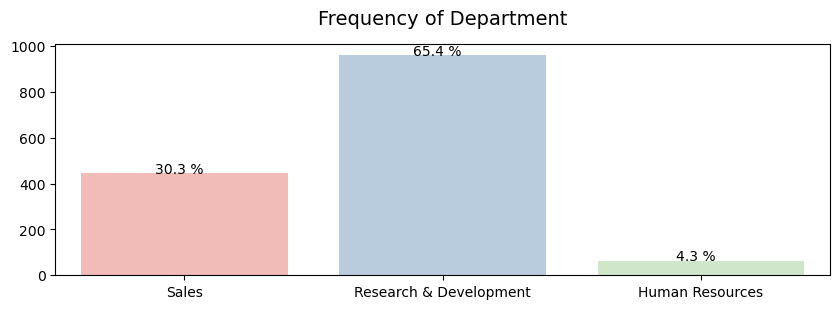

In [31]:
# Visualize the frequency of Department(2)
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Department', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Department", size=14, y=1.05)

df['Department'].value_counts().to_frame()

65.4% of the dataset corresponds to the Research & Development department, 30.3% to Sales, and 4.3% to Human Resources.

EducationField
Life Sciences                606
Medical                      464
Marketing                    159
Technical Degree             132
Other                         82
Human Resources               27

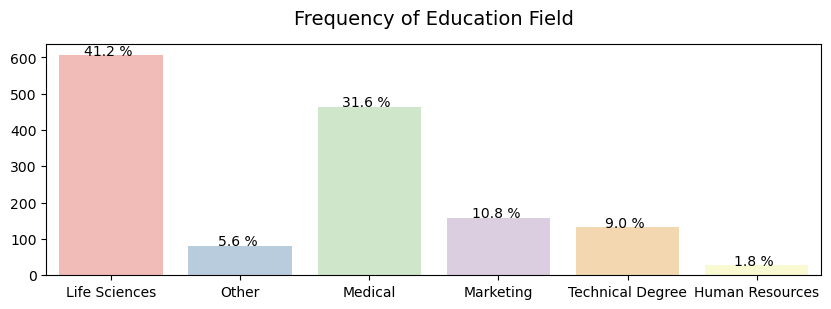

In [32]:
# Visualize the frequency of Education Field(3)
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='EducationField', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Education Field", size=14, y=1.05)

df['EducationField'].value_counts().to_frame()

41.2% of the employees have a Life Sciences background, and only 1.8% have a Human Resources background. 5.6% of the group corresponds to other fields.

Gender
Male       882
Female     588

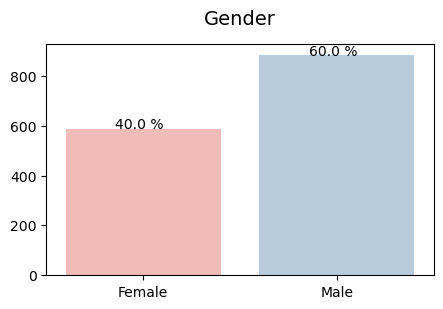

In [33]:
# Visualize the frequency of Gender(4)
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Gender', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Gender", size=14, y=1.05)

df['Gender'].value_counts().to_frame()

There is a relation 60/40 between male and female distribution, with a majority of males.

no.      %
Sales Executive            326  22.18
Research Scientist         292  19.86
Laboratory Technician      259  17.62
Manufacturing Director     145   9.86
Healthcare Representative  131   8.91
Manager                    102   6.94
Sales Representative        83   5.65
Research Director           80   5.44
Human Resources             52   3.54

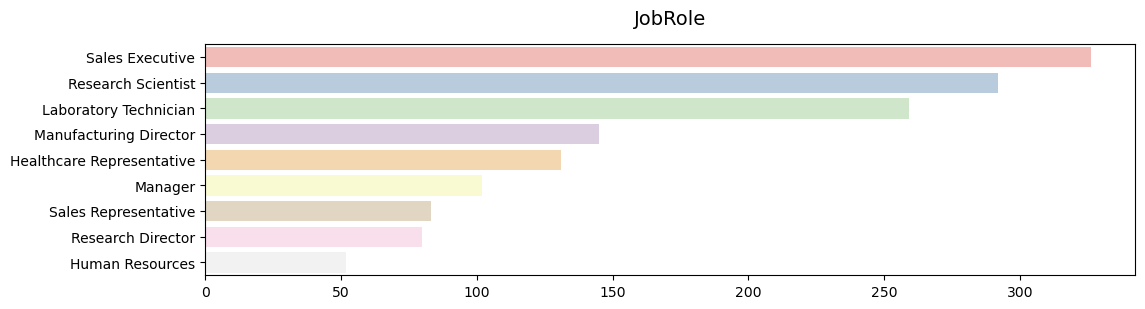

In [34]:
# Visualize the frequency of JobRole(5)
plt.figure(figsize=(12, 3))
ax = sns.countplot(y='JobRole', data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"JobRole", size=14, y=1.05)

job_roles = df.JobRole.value_counts().to_frame("no.")
job_roles["%"] = round(df.JobRole.value_counts(normalize=True) * 100, 2)
job_roles

22.18% of the group are Sales Executives, followed by Research Scientist with 19.86%. The small group is Human Resources with 3.54%

No.      %
Married   673  45.78
Single    470  31.97
Divorced  327  22.24

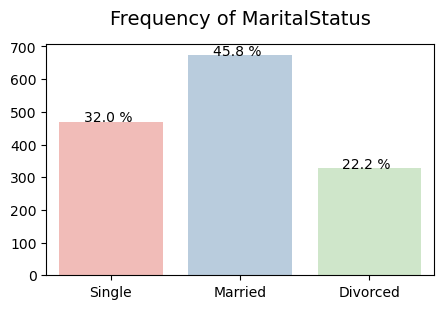

In [35]:
# Visualize the frequency of MaritalStatus(6)
col = 'MaritalStatus'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

45.8% of the group is married, followed by 32.0% of single, and the rest 22.2% are divorced.

No.     %
No   1054  71.7
Yes   416  28.3

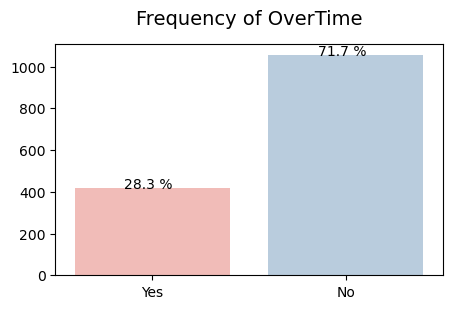

In [36]:
# Visualize the frequency of OverTime(7)
col = 'OverTime'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

Only the 28.3% do overtime.

#### 1.4.1.3 Numerical columns analyzed as categories

In [37]:
# List of numerical columns that look like categories
for i,col in enumerate(num_cat_col):
    print(f"{i+1}. {col}")

1. Education
2. EnvironmentSatisfaction
3. JobInvolvement
4. JobLevel
5. JobSatisfaction
6. NumCompaniesWorked
7. PerformanceRating
8. RelationshipSatisfaction
9. StockOptionLevel
10. WorkLifeBalance


No.      %
3  572  38.91
4  398  27.07
2  282  19.18
1  170  11.56
5   48   3.27

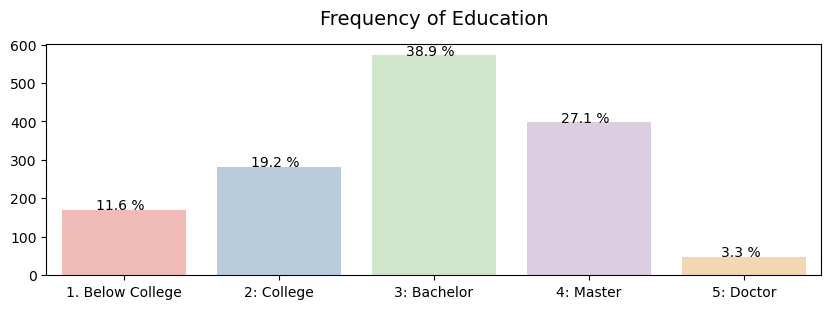

In [38]:
# Visualize the frequency of Education(1)
col = 'Education'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3, 4), ['1. Below College', '2: College', '3: Bachelor', '4: Master', '5: Doctor'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

The majority of the group has 38.9% Bachelor level education, followed by Master level with 27.1%, and College level with 19.2%. There is a minority with Doctor level education (3.3%) and there is an 11.6% bellow college-level education.

No.      %
3  453  30.82
4  446  30.34
2  287  19.52
1  284  19.32

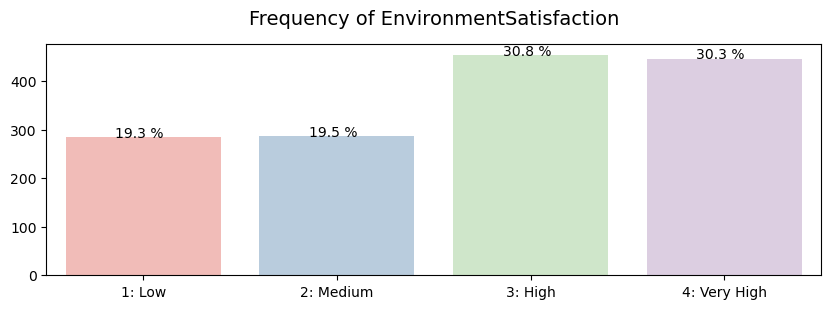

In [39]:
# Visualize the frequency of EnvironmentSatisfaction(2)
col = 'EnvironmentSatisfaction'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

61.1% of the group rated the work environment as High or Very high but there is 19.5% rated it as medium and 19.3% as low.

No.      %
3  868  59.05
2  375  25.51
4  144   9.80
1   83   5.65

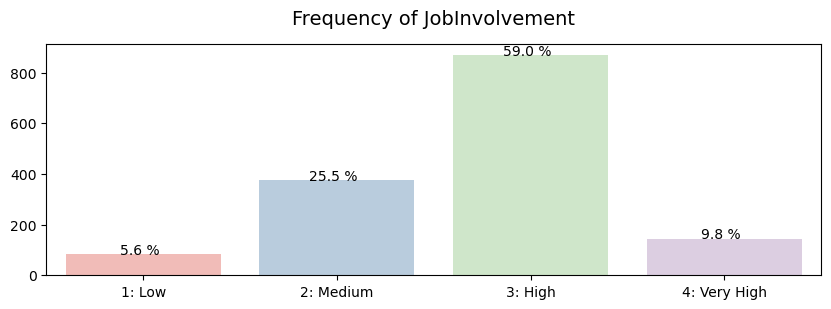

In [40]:
# Visualize the frequency of JobInvolvement(3)
col = 'JobInvolvement'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

59.0% have a high job involvement, and only 5.6% has a low job involvement.

No.      %
1  543  36.94
2  534  36.33
3  218  14.83
4  106   7.21
5   69   4.69

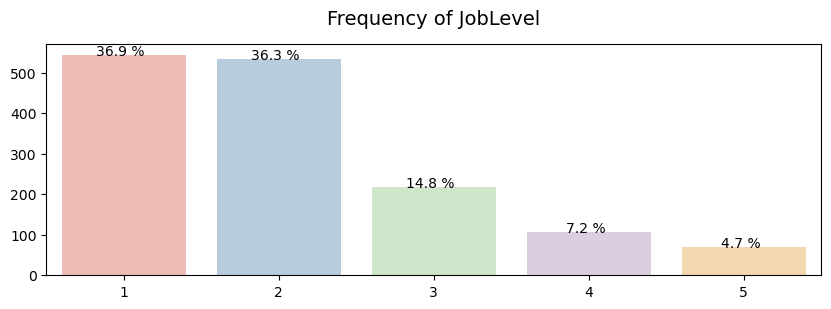

In [41]:
# Visualize the frequency of JobLevel(4)
col = 'JobLevel'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

36.9% and 36.3% are in job levels 1 and 2 respectively. Only 4.7% is in level 5. 

No.      %
4  459  31.22
3  442  30.07
1  289  19.66
2  280  19.05

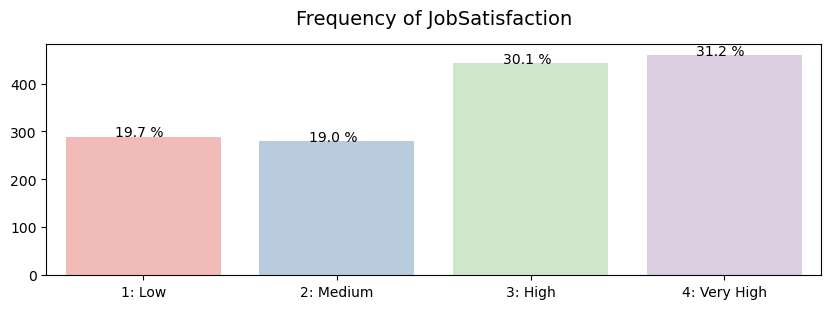

In [42]:
# Visualize the frequency of JobSatisfaction(5)
col = 'JobSatisfaction'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

61.3% (30.1% + 31.2%) of the group rated job satisfaction as High or Very high but there is 19.0% rated it as medium and 19.7% as low.

No.      %
1  521  35.44
0  197  13.40
3  159  10.82
2  146   9.93
4  139   9.46
7   74   5.03
6   70   4.76
5   63   4.29
9   52   3.54
8   49   3.33

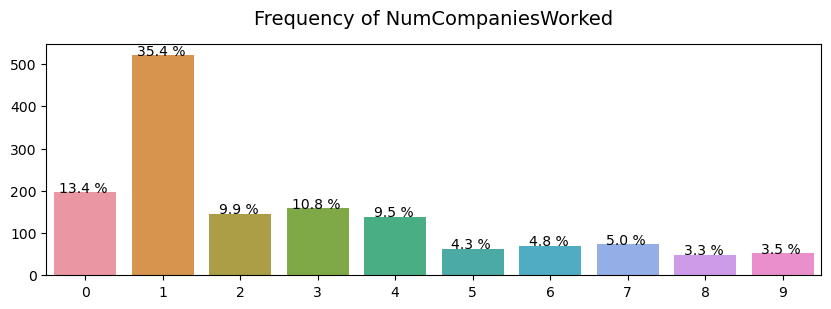

In [43]:
# Visualize the frequency of NumCompaniesWorked(6)
col = 'NumCompaniesWorked'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

35.4% worked in 1 company, and 20.9% worked in 5 or more companies.

No.      %
3  1244  84.63
4   226  15.37

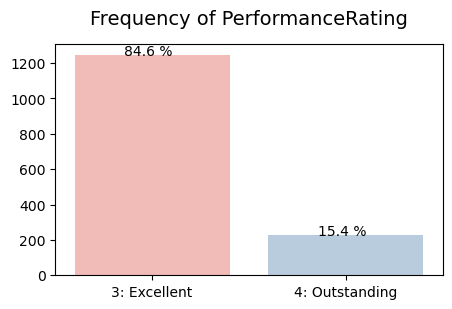

In [44]:
# Visualize the frequency of PerformanceRating(7)
col = 'PerformanceRating'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['3: Excellent', '4: Outstanding'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

84.6% have an excellent performance rating, and 15.4% have an outstanding rating.

No.      %
3  459  31.22
4  432  29.39
2  303  20.61
1  276  18.78

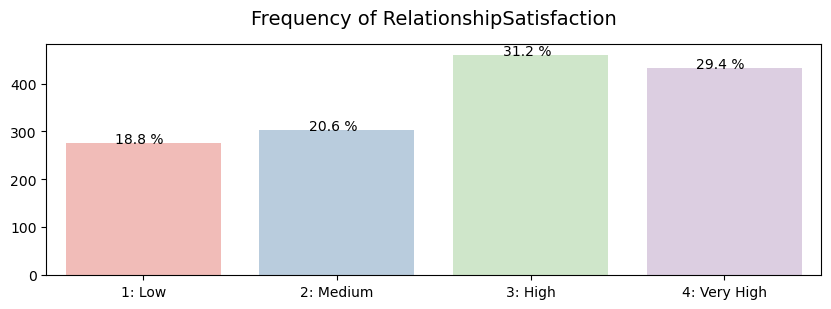

In [45]:
# Visualize the frequency of RelationshipSatisfaction(8)
col = 'RelationshipSatisfaction'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

60.6% (31.2% + 29.4%) of the group rated relationship satisfaction as High or Very high but there is 20.6% rated it as medium and 18.8% as low.

No.      %
0  631  42.93
1  596  40.54
2  158  10.75
3   85   5.78

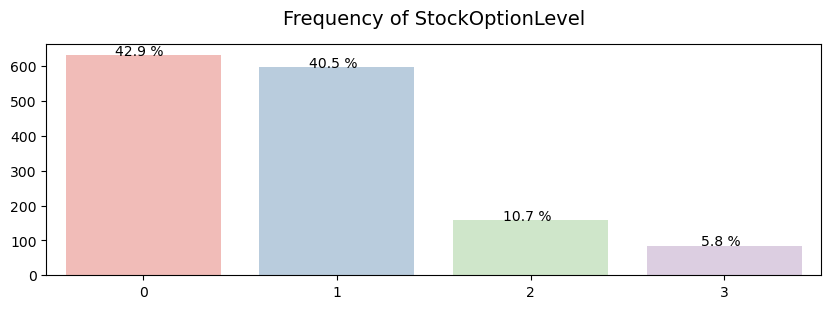

In [46]:
# Visualize the frequency of StockOptionLevel(9)
col = 'StockOptionLevel'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

42.9% have 0 as the stock option level, followed by 40.5% that have 1 as the option level. Only 5.8% have 3 as an option level.

No.      %
3  893  60.75
2  344  23.40
4  153  10.41
1   80   5.44

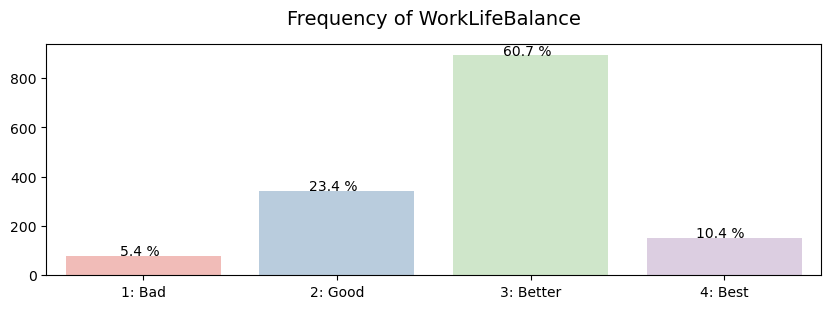

In [47]:
# Visualize the frequency of WorkLifeBalance(10)
col = 'WorkLifeBalance'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Bad', '2: Good', '3: Better', '4: Best'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

60.7% qualified as better work-life balance, followed by 23.4% that had a good work-life balance. Only 5.4% qualified for as bad work-life balance.

#### 1.4.1.4 Numerical columns

In [48]:
# Select the rest of the numerical columns
num_col = [col for col in numerical_col if col not in num_cat_col]
num_col

# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i}. {col}")

0. Age
1. DailyRate
2. DistanceFromHome
3. HourlyRate
4. MonthlyIncome
5. MonthlyRate
6. PercentSalaryHike
7. TotalWorkingYears
8. TrainingTimesLastYear
9. YearsAtCompany
10. YearsInCurrentRole
11. YearsSinceLastPromotion
12. YearsWithCurrManager


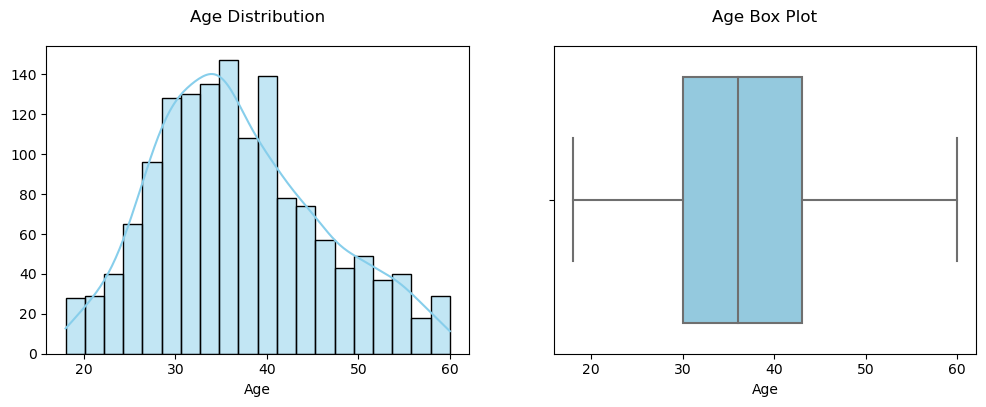

Skewness of Age : 0.4132863018563338


In [49]:
#Visualize (0)Age distribution
col = 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Age
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Age is skewed to the right. There are no outliers present in the Box plot.

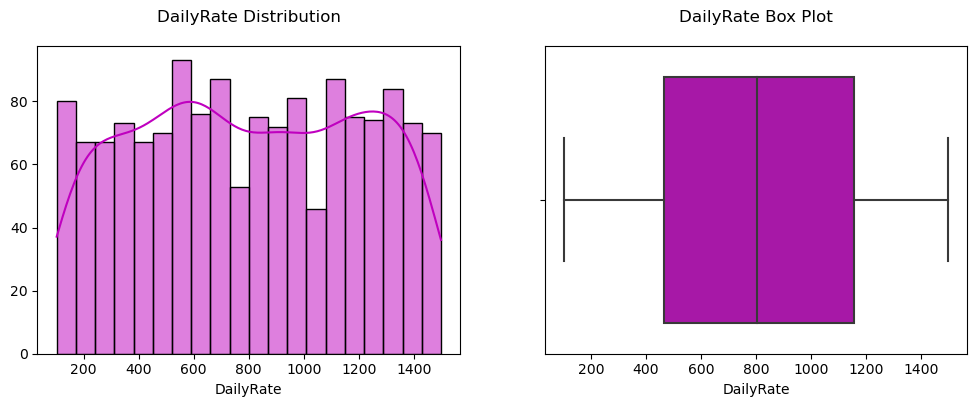

Skewness of DailyRate : -0.003518568352325854


In [50]:
#Visualize (1)DailyRate distribution
col = 'DailyRate'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df[col], ax=axes[1], color='m')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of DailyRate is slightly skewed to the left. There are no outliers present in the Box plot.

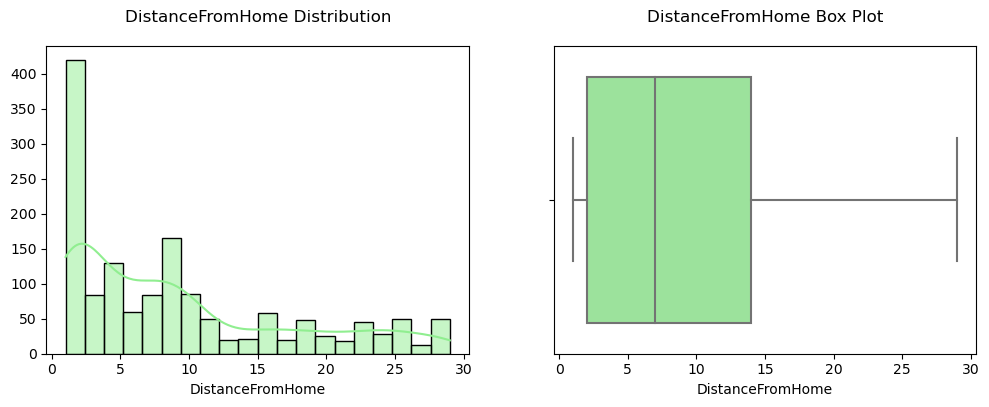

Skewness of DistanceFromHome : 0.9581179956568269


In [51]:
#Visualize (2)DistanceFromHome distribution
col = 'DistanceFromHome'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of DistanceFromHome is skewed to the right. There are no outliers present in the Box plot.

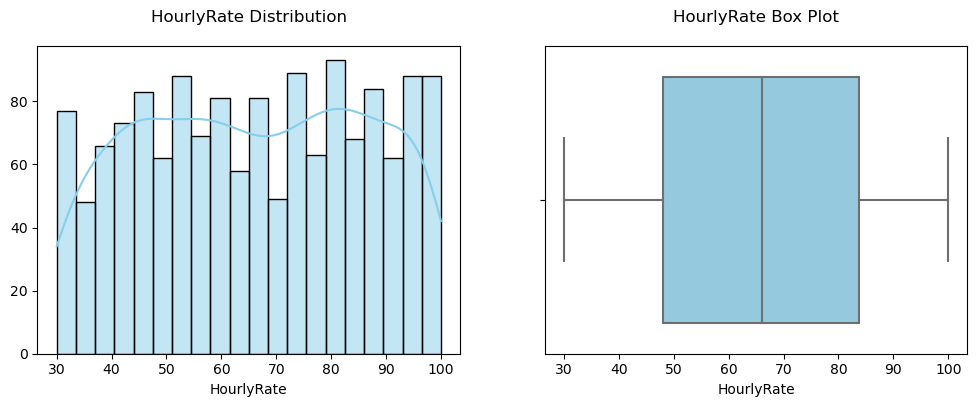

Skewness of HourlyRate : -0.03231095290044942


In [52]:
#Visualize (3)HourlyRate distribution
col = 'HourlyRate'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of HourlyRate is slightly skewed to the left. There are no outliers present in the Box plot.

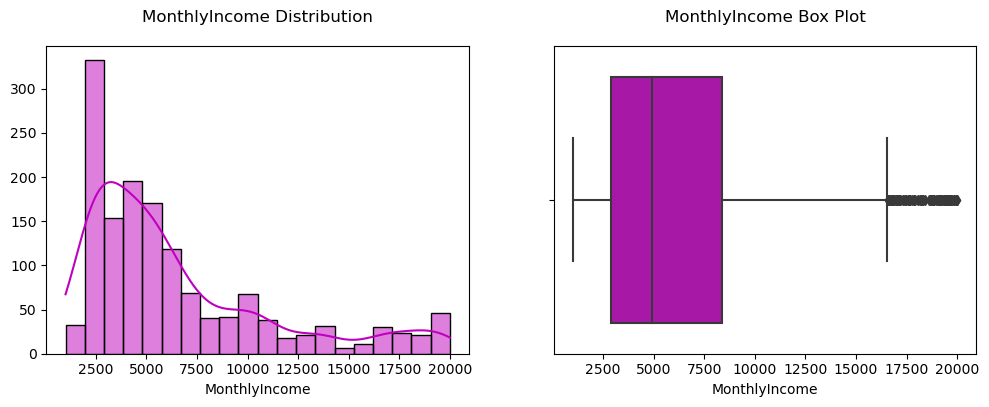

Skewness of MonthlyIncome : 1.3698166808390662


In [53]:
#Visualize (4)MonthlyIncome distribution
col = 'MonthlyIncome'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df[col], ax=axes[1], color='m')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of MonthlyIncome is skewed to the right. There are outliers present in the Box plot.

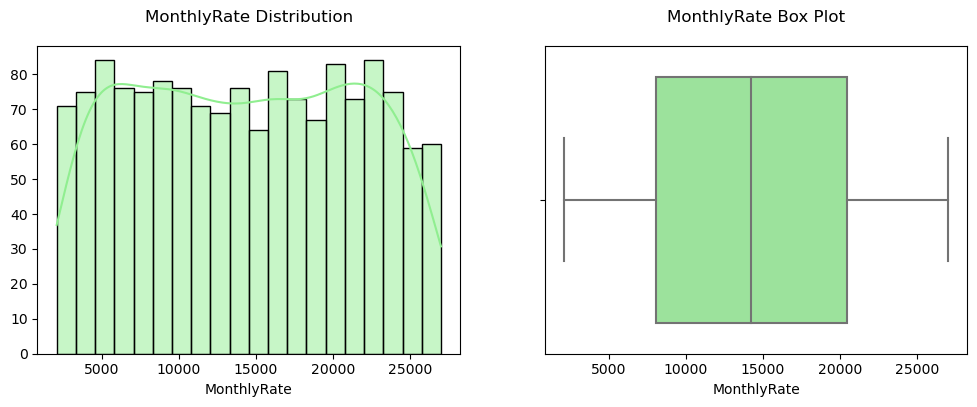

Skewness of MonthlyRate : 0.018577807891132458


In [54]:
#Visualize (5)MonthlyRate distribution
col = 'MonthlyRate'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of MonthlyRate is slightly skewed to the right. There are no outliers present in the Box plot.

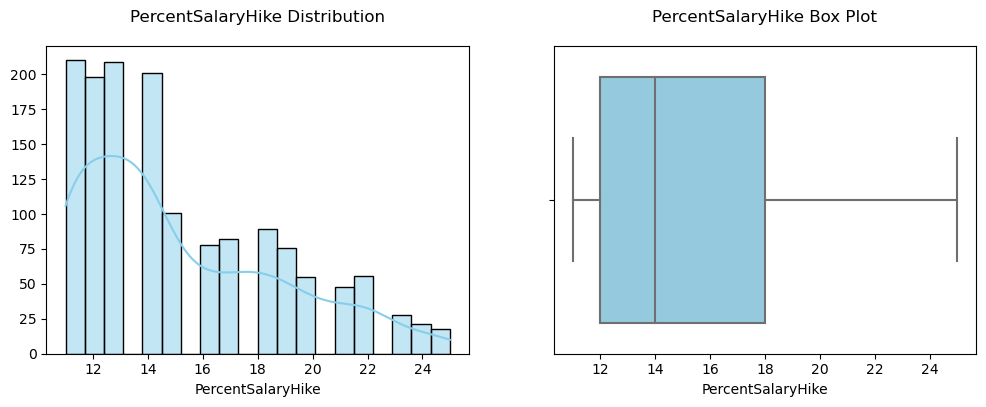

Skewness of PercentSalaryHike : 0.8211279755780908


In [55]:
#Visualize (6)PercentSalaryHike distribution
col = 'PercentSalaryHike'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of PercentSalaryHike is skewed to the right. There are no outliers present in the Box plot.

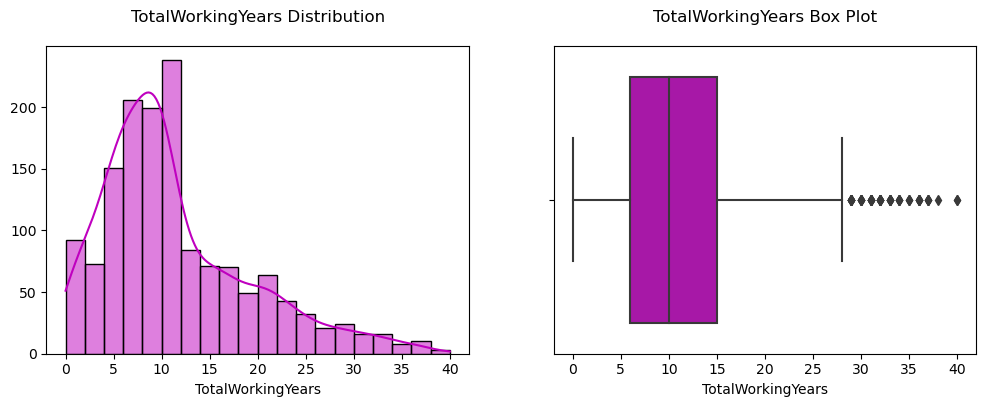

Skewness of TotalWorkingYears : 1.1171718528128527


In [56]:
#Visualize (7)TotalWorkingYears distribution
col = 'TotalWorkingYears'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df[col], ax=axes[1], color='m')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of TotalWorkingYears is skewed to the right. There are outliers present in the Box plot.

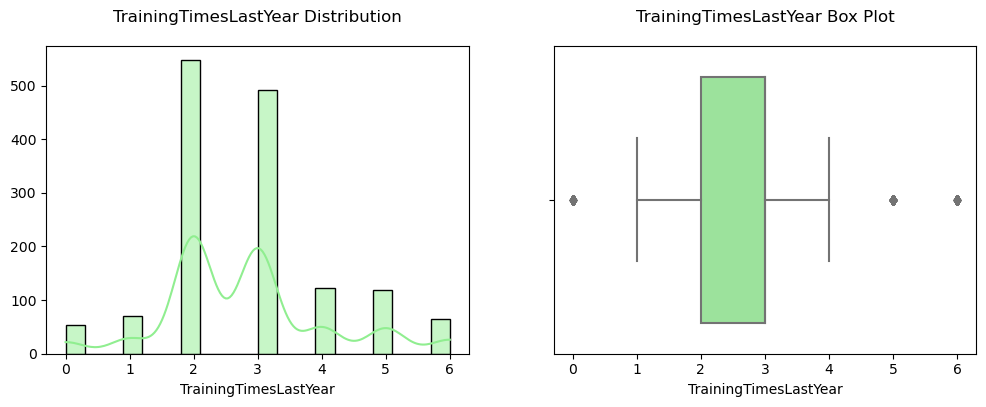

Skewness of TrainingTimesLastYear : 0.5531241710537028


In [57]:
#Visualize (8)TrainingTimesLastYear distribution
col = 'TrainingTimesLastYear'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution has two peaks in 2 and 3. There are outliers present in the Box plot.

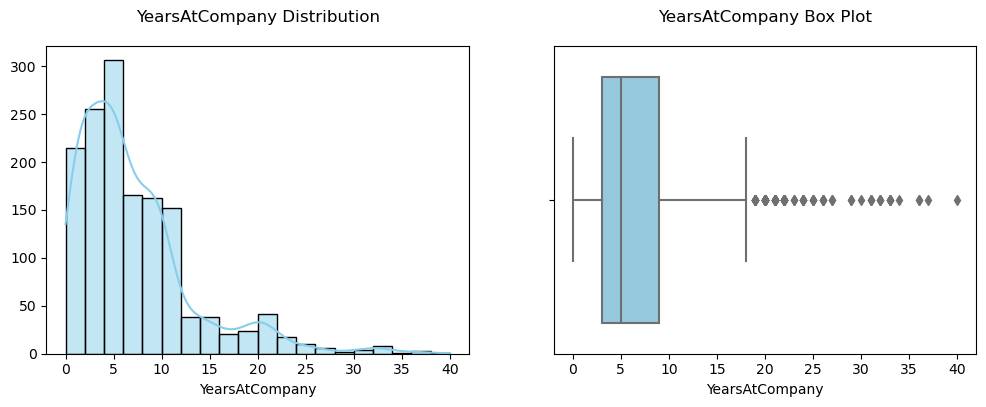

Skewness of YearsAtCompany : 1.7645294543422085


In [58]:
#Visualize (9)YearsAtCompany distribution
col = 'YearsAtCompany'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of YearsAtCompany is skewed to the right. There are outliers present in the Box plot.

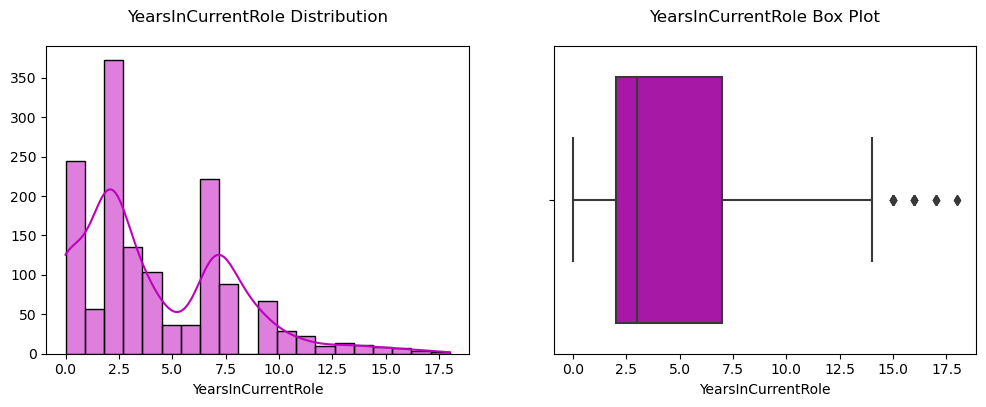

Skewness of YearsInCurrentRole : 0.9173631562908262


In [59]:
#Visualize (10)YearsInCurrentRole distribution
col = 'YearsInCurrentRole'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df[col], ax=axes[1], color='m')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of YearsInCurrentRole is skewed to the right. There are outliers present in the Box plot.

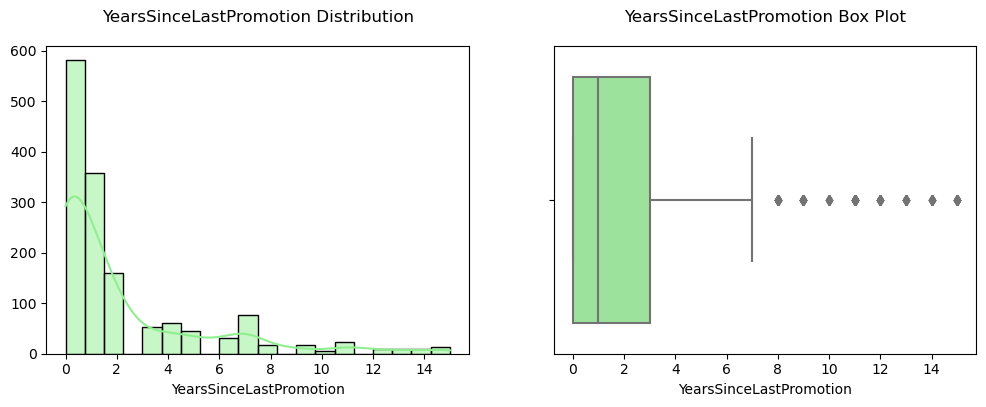

Skewness of YearsSinceLastPromotion : 1.9842899833524859


In [60]:
#Visualize (11)YearsSinceLastPromotion distribution
col = 'YearsSinceLastPromotion'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of YearsSinceLastPromotion is skewed to the right. There are outliers present in the Box plot.

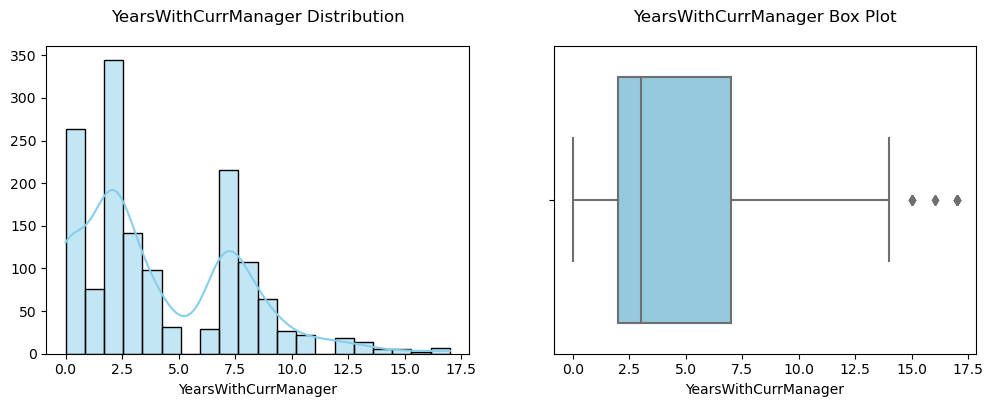

Skewness of YearsWithCurrManager : 0.8334509919918475


In [61]:
#Visualize (12)YearsWithCurrManager distribution
col = 'YearsWithCurrManager'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of YearsWithCurrManager is skewed to the right. There are outliers present in the Box plot.

#### 1.4.1.5 Univariate Boxplot

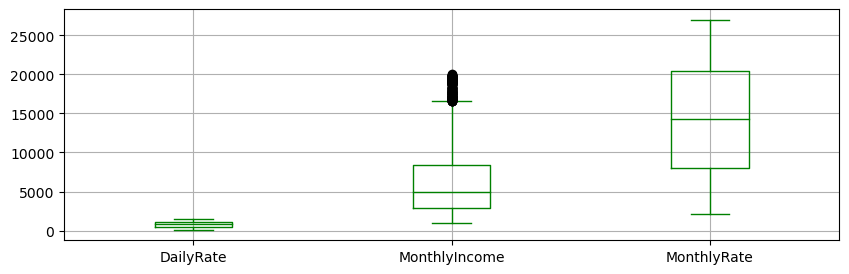

In [62]:
# Draw a boxplot for variables: ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
plt.figure(figsize=(10, 3))
df.boxplot(column=['DailyRate', 'MonthlyIncome', 'MonthlyRate'], figsize=(10,10), color='green');

MonthlyIncome presents outliers. The dataset presents the data in different scales.

In [63]:
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [64]:
# Columns with similar scale
col_boxplot = [num_col[0]] +num_col[2:4] + num_col[6:]
col_boxplot

['Age',
 'DistanceFromHome',
 'HourlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

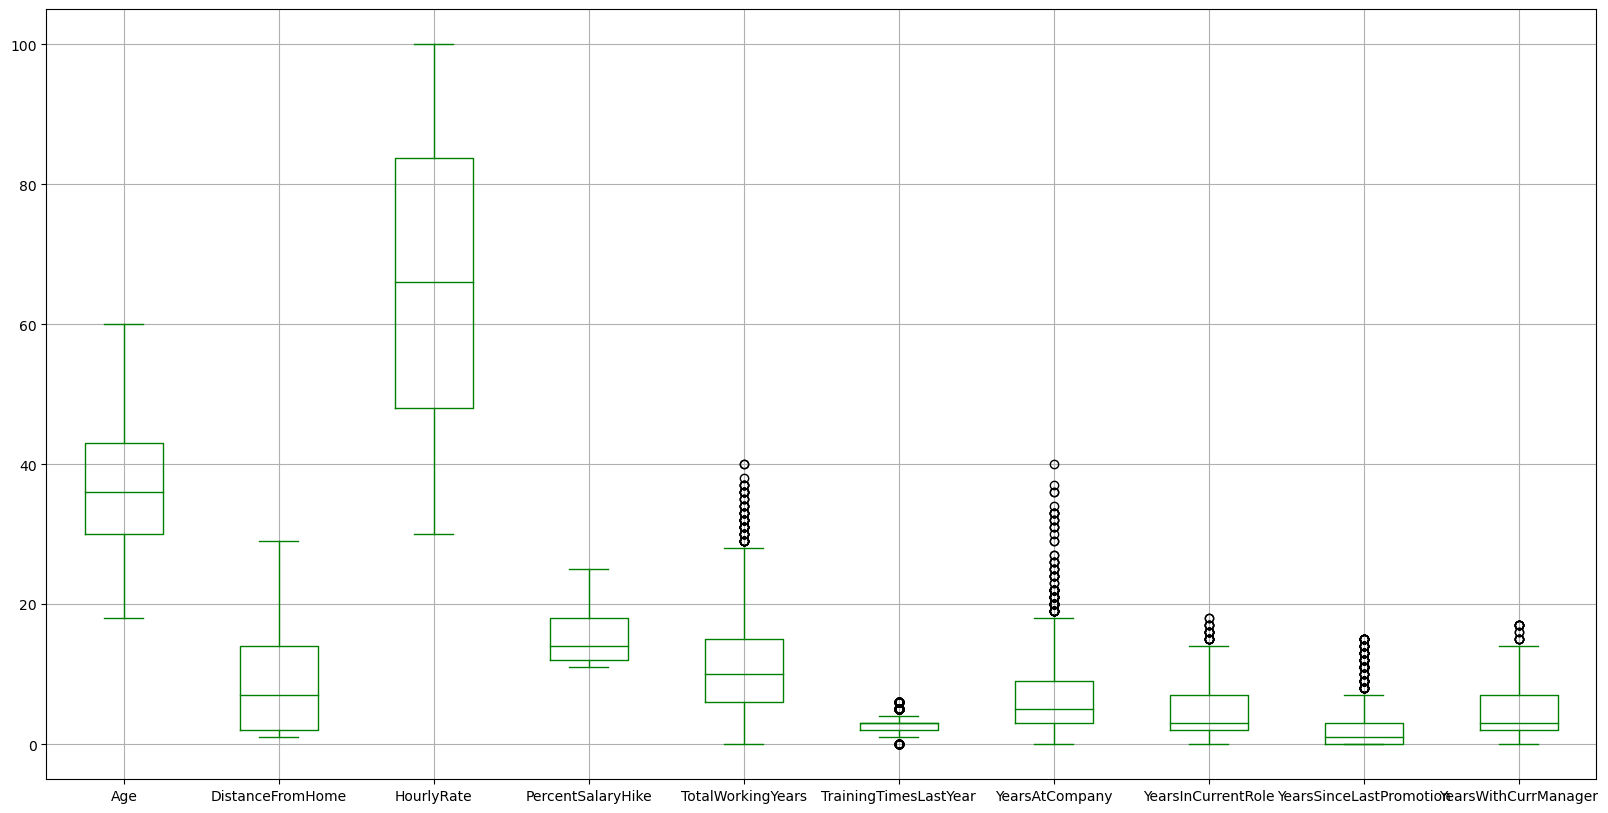

In [65]:
# Draw a boxplot for the rest of independent variables 
df.boxplot(column=col_boxplot, figsize=(20,10), color='green')
plt.show()

The columns TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager present outliers.

### 1.4.2  Bivariate Analysis
#### 1.4.2.1 BoxPlot Analysis:  Finding outliers


In [66]:
# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i}. {col}")

0. Age
1. DailyRate
2. DistanceFromHome
3. HourlyRate
4. MonthlyIncome
5. MonthlyRate
6. PercentSalaryHike
7. TotalWorkingYears
8. TrainingTimesLastYear
9. YearsAtCompany
10. YearsInCurrentRole
11. YearsSinceLastPromotion
12. YearsWithCurrManager


Age


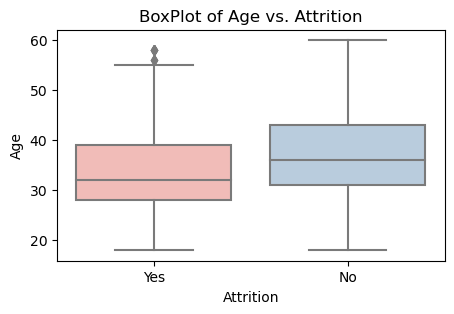

In [67]:
# Visualizing and comparing each independent variable with Attrition
# Columns 0. Age 
col = 'Age'
print(col)
plt.figure(figsize=(5, 3))
sns.boxplot(data=df[[col,'Attrition']], y=col, x='Attrition')
plt.title(f"BoxPlot of {col} vs. Attrition")
    
plt.show()

Age column presents outliers for Attrition=Yes. Seems like the youngest employees tend to attrition more than the oldest.

['Age', 'DailyRate']


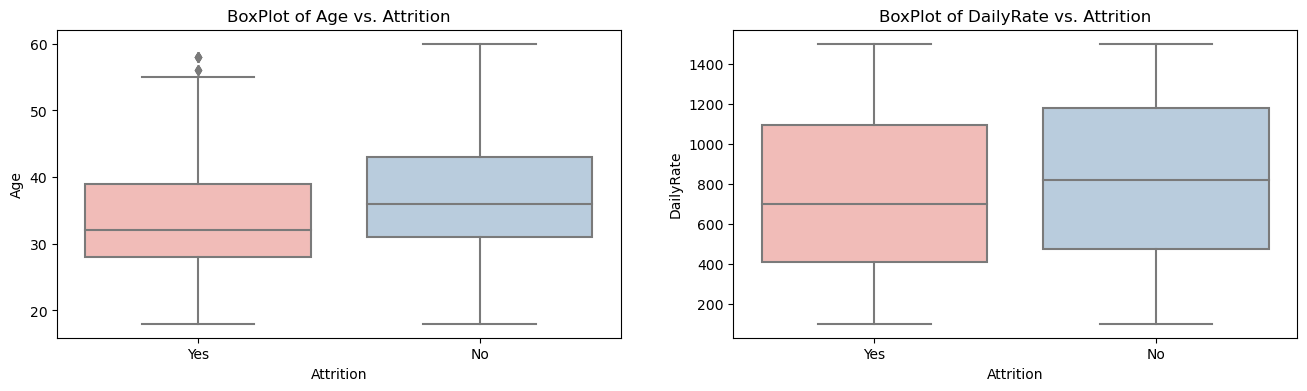

In [68]:
# Columns 1. DailyRate and 2. DistanceFromHome
cols = [num_col[0], num_col[1]]
print(cols)

# data = df[[num_col[0], num_col[1]]]
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
for ax, column in zip(axs.flat, cols):
    sns.boxplot(data=df[cols + ['Attrition']], y=column, x='Attrition', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Attrition")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**

- Seems like DailRate has similar metrics for yes/no attrition, with a slight inclination for No when DailyRate is higher.
- DistanceFromHome has higher values for Yes.
- No outliers in DailyRate or DistanceFromHome

['DistanceFromHome', 'HourlyRate']


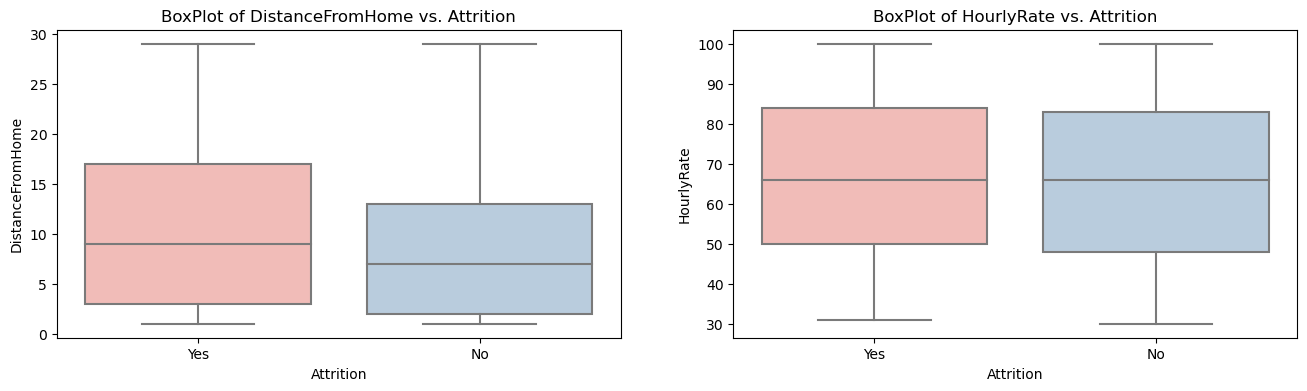

In [69]:
# Columns 3. HourlyRate and 4. MonthlyIncome
cols = [num_col[2], num_col[3]]
print(cols)

# data = df[[num_col[0], num_col[1]]]
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
for ax, column in zip(axs.flat, cols):
    sns.boxplot(data=df[cols + ['Attrition']], y=column, x='Attrition', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Attrition")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**

- Similar values for yes and no attrition in HourlyRate column. There are no outliers.
- Seems like MonthlyIncome is low for Yes attrition. There are outlieres for Yes and No.

['MonthlyIncome', 'MonthlyRate']


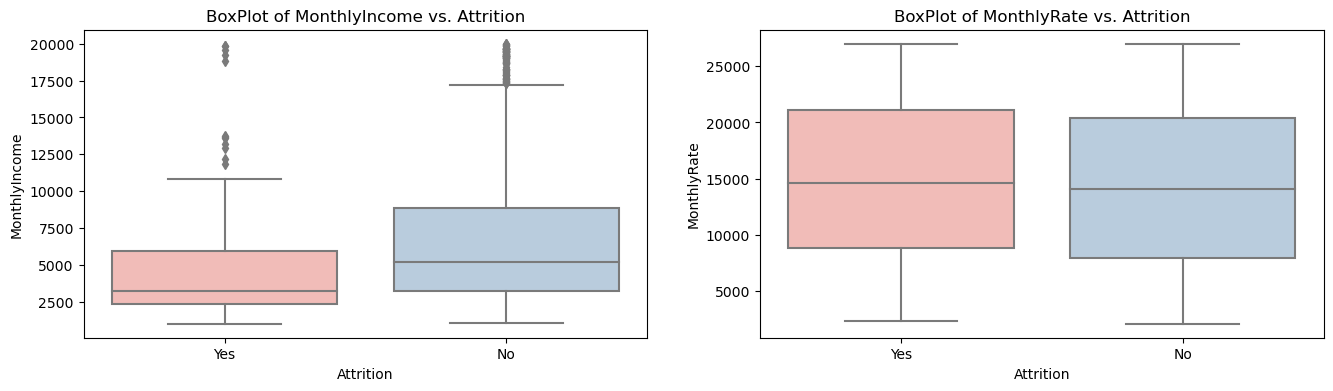

In [70]:
# Columns 5. MonthlyRate and 6. PercentSalaryHike
cols = [num_col[4], num_col[5]]
print(cols)

# data = df[[num_col[0], num_col[1]]]
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
for ax, column in zip(axs.flat, cols):
    sns.boxplot(data=df[cols + ['Attrition']], y=column, x='Attrition', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Attrition")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**

- Similar values for yes and no attrition in MonthlyRate column. There are no outliers.
- There are outlieres for Yes in PercentSalarHike colulmn.

['PercentSalaryHike', 'TotalWorkingYears']


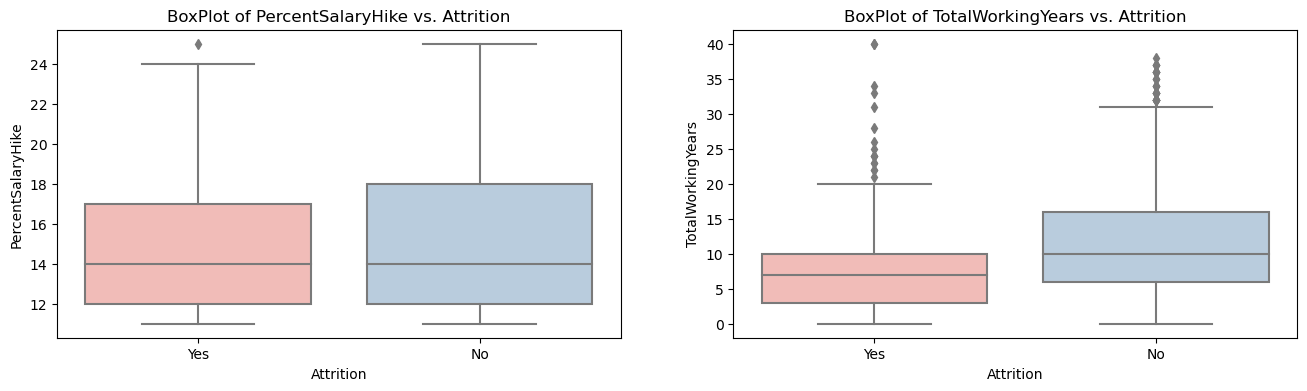

In [71]:
# Columns 7. TotalWorkingYears and 8. TrainingTimesLastYear
cols = [num_col[6], num_col[7]]
print(cols)

# data = df[[num_col[0], num_col[1]]]
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
for ax, column in zip(axs.flat, cols):
    sns.boxplot(data=df[cols + ['Attrition']], y=column, x='Attrition', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Attrition")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**

- There are outliers for Yes and No, in TotalWorkingYears and TrainingTimesLastYear columns.

['TrainingTimesLastYear', 'YearsAtCompany']


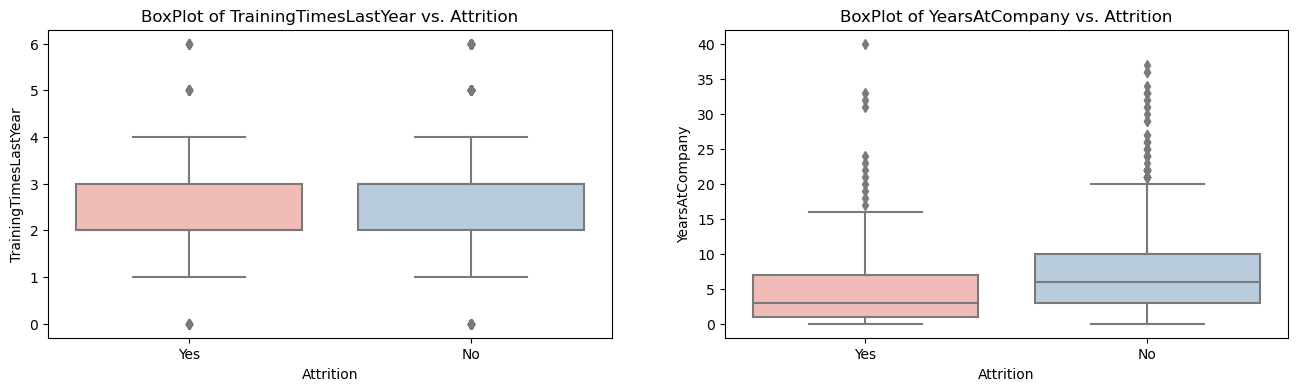

In [72]:
# Columns 9. YearsAtCompany and 10. YearsInCurrentRole
cols = [num_col[8], num_col[9]]
print(cols)

# data = df[[num_col[0], num_col[1]]]
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
for ax, column in zip(axs.flat, cols):
    sns.boxplot(data=df[cols + ['Attrition']], y=column, x='Attrition', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Attrition")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**

- There are outliers for Yes and No, in YearsAtCompany and YearsInCurrentRole columns. 
- Those who have been in the company or in the role they play for more years tend to stay with the company.

['YearsInCurrentRole', 'YearsSinceLastPromotion']


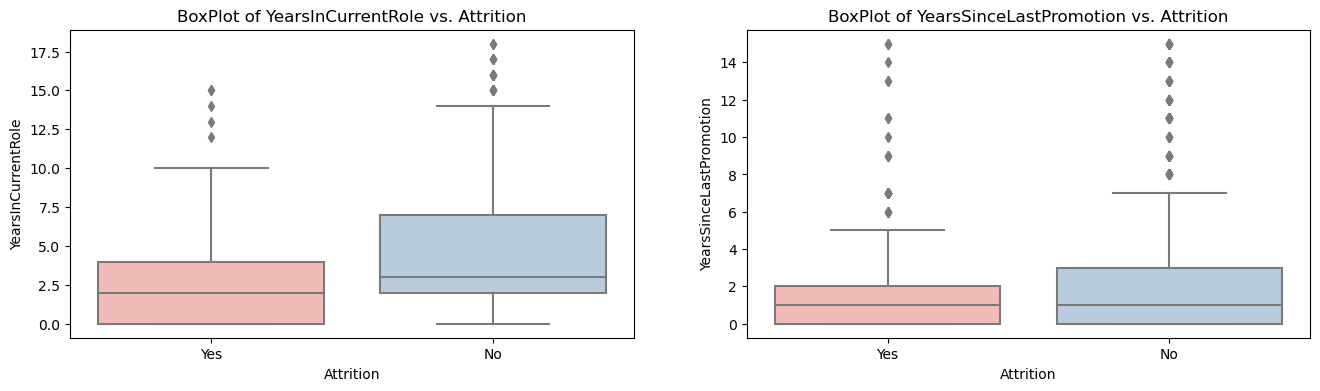

In [73]:
# Columns 11. YearsSinceLastPromotion and 12. YearsWithCurrManager
cols = [num_col[10], num_col[11]]
print(cols)

# data = df[[num_col[0], num_col[1]]]
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
for ax, column in zip(axs.flat, cols):
    sns.boxplot(data=df[cols + ['Attrition']], y=column, x='Attrition', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Attrition")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**

- There are outliers for Yes and No, in YearsSinceLastPromotion and YearsWithCurrManager columns. 
- Those who have been with the current manager for more years tend to stay with the company.

#### 1.4.2.2 Relation between target variable and categorical columns

In [74]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}")

1.BusinessTravel
2.Department
3.EducationField
4.Gender
5.JobRole
6.MaritalStatus
7.OverTime


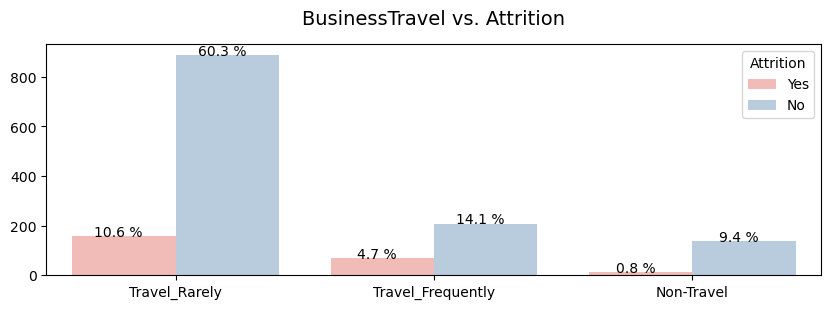

In [75]:
# Compare BusinessTravel vs Attrition
col = 'BusinessTravel'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

10.6% of employees who attrition travel rarely, 4.7% travel frequently, and 0.8% do not travel.

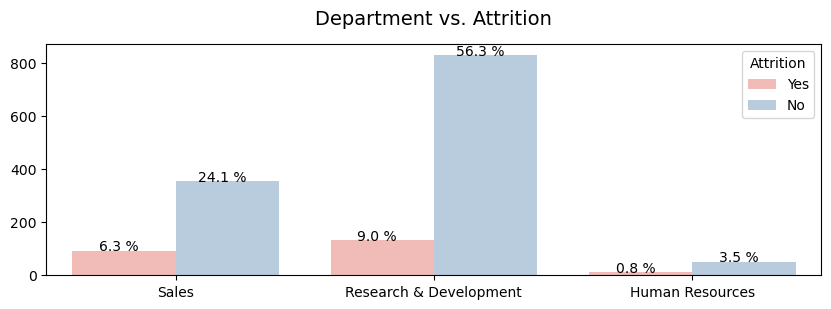

In [76]:
# Compare Department vs Attrition
col = 'Department'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The majority of employees who attrition belong to Research & Development (9.0%) but we must consider that most of the employees belong to this department with 65.3% in total.

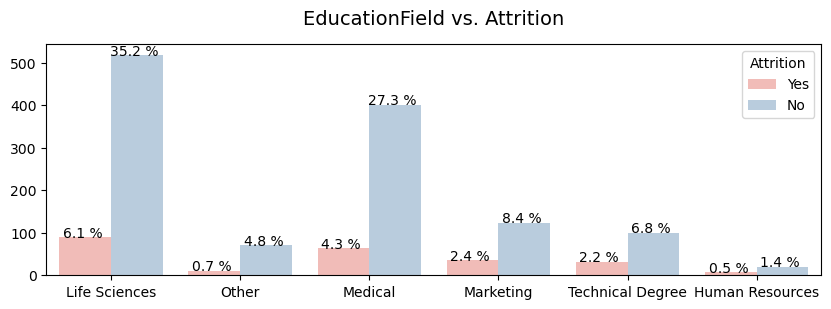

In [77]:
# Compare EducationField vs Attrition
col = 'EducationField'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The most significant group of employees who attrition belong to Life Sciences, followed by Medical education field.

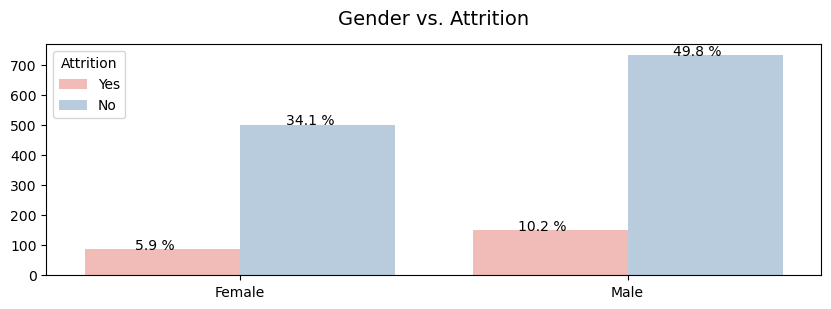

In [78]:
# Compare Gender vs Attrition
col = 'Gender'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The percentage of employees who attrition is almost twice for males(10.2%) than females(5.9%), but one more time there are more male employees than female employees.

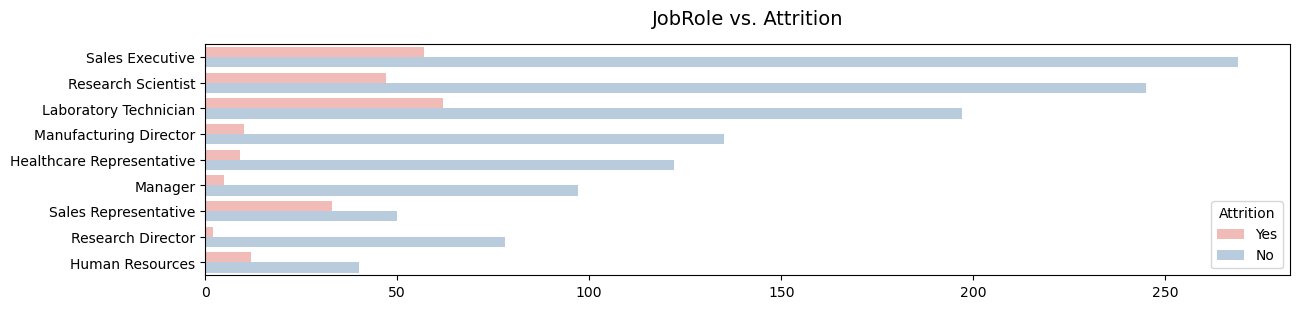

In [79]:
# Compare JobRole vs Attrition
col = 'JobRole'
plt.figure(figsize=(14, 3))
ax = sns.countplot(y=col, hue='Attrition', data=df)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The JobRole with most employees who attrition is Laboratory Technician, followed by Sales Executive and Research Scientist.

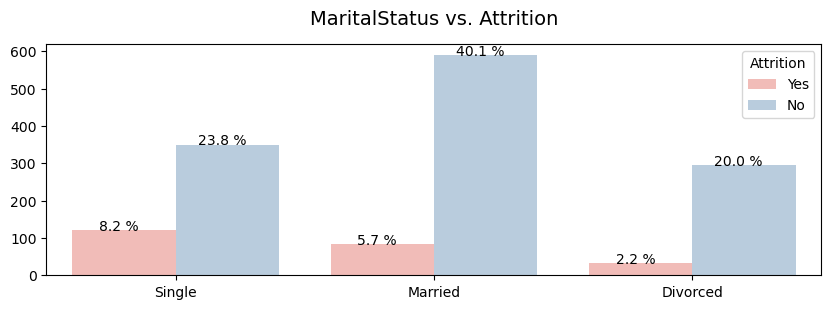

In [80]:
# Compare MaritalStatus vs Attrition
col = 'MaritalStatus'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The single group has the highest percentage of attrition with 8.2%, then comes the married group with 5.7% and the divorced group with 2.2%.

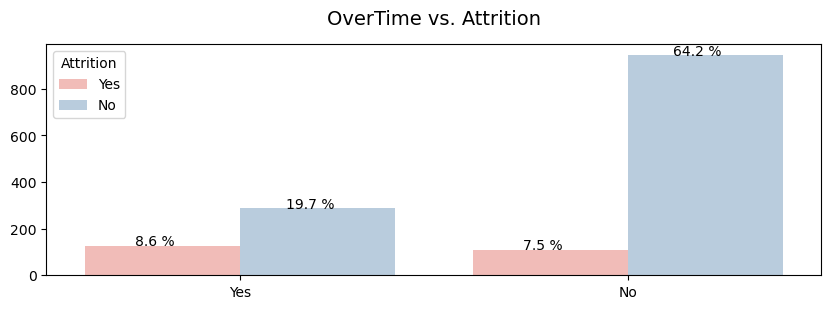

In [81]:
# Compare OverTime vs Attrition
col = 'OverTime'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

There is a slight difference between the percentage of employes attrition from those who do overtime (8.6%) and those who do not (7.5%).

#### 1.4.2.3 Relation between target variable and Numerical columns analyzed as categories

In [82]:
# List of numerical columns that look like categories
for i,col in enumerate(num_cat_col):
    print(f"{i+1}. {col}")

1. Education
2. EnvironmentSatisfaction
3. JobInvolvement
4. JobLevel
5. JobSatisfaction
6. NumCompaniesWorked
7. PerformanceRating
8. RelationshipSatisfaction
9. StockOptionLevel
10. WorkLifeBalance


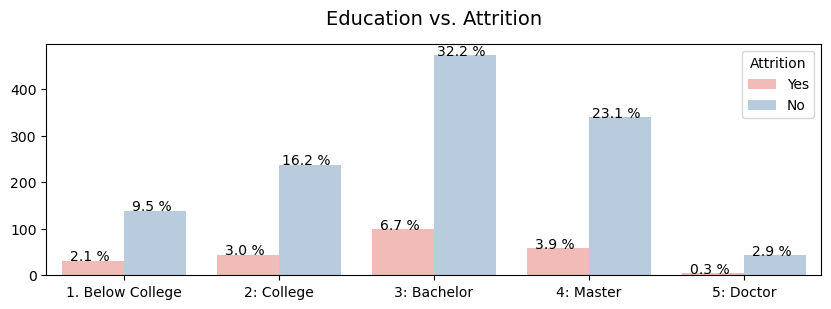

In [83]:
# Compare Education vs Attrition
col = 'Education'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3, 4), ['1. Below College', '2: College', '3: Bachelor', '4: Master', '5: Doctor'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The highest percentage of attrition is for the group education 3 Bachelor 6.7%.

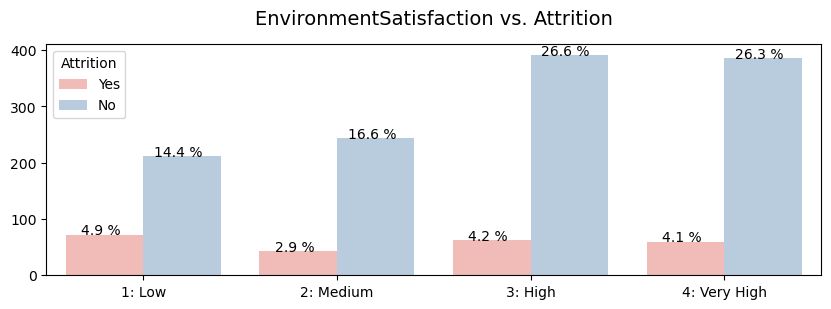

In [84]:
# Compare EnvironmentSatisfaction vs Attrition
col = 'EnvironmentSatisfaction'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The percentage of attrition correspond to low (4.9%) environment satisfaction is slightly higher than the high(4.2%) or very high (4.1%) environment satisfaction.

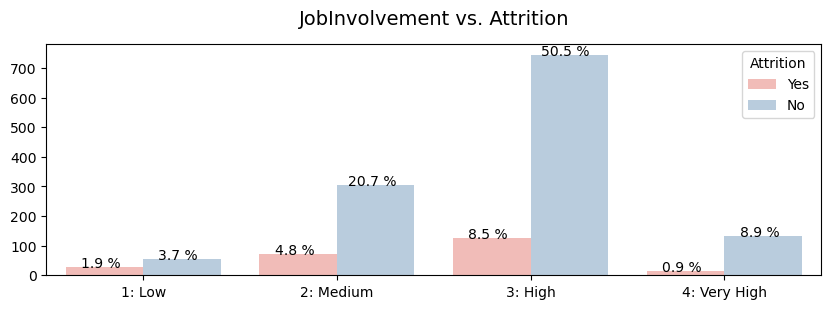

In [85]:
# Compare JobInvolvement vs Attrition
col = 'JobInvolvement'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The major percentage of attrition corresponds to High job involvement (8.5%), however, the employees who correspond to high job involvement are the majority with 59% of the total.

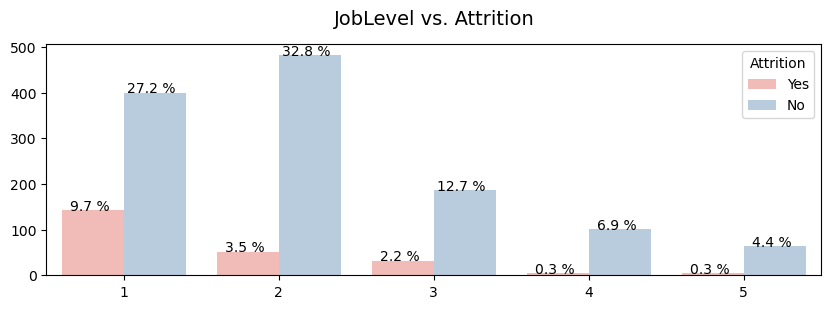

In [86]:
# Compare JobLevel vs Attrition
col = 'JobLevel'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The highest attrition corresponds to job level 1 with 9.7%

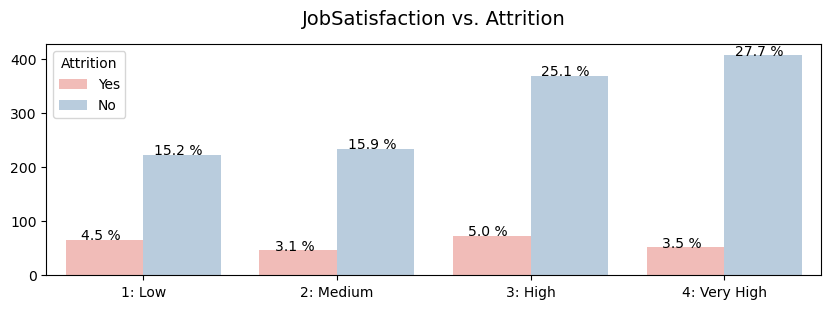

In [87]:
# Compare JobSatisfaction vs Attrition
col = 'JobSatisfaction'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05);

Attrition has similar values in all job satisfaction values, it seems that this feature does not have a major implication in the result.

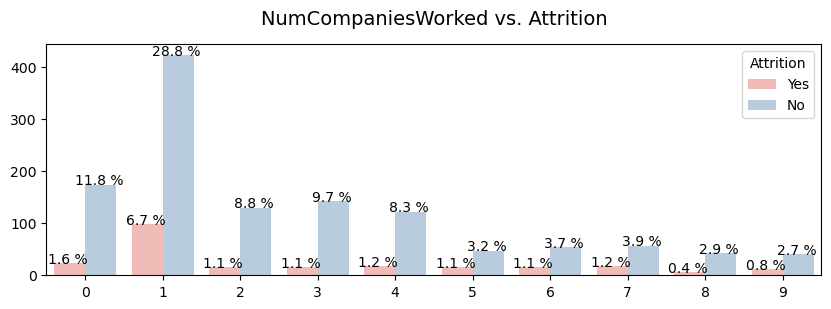

In [88]:
# Compare NumCompaniesWorked vs Attrition
col = 'NumCompaniesWorked'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

Employees with one year working have the highest attrition percentage with 6.7%

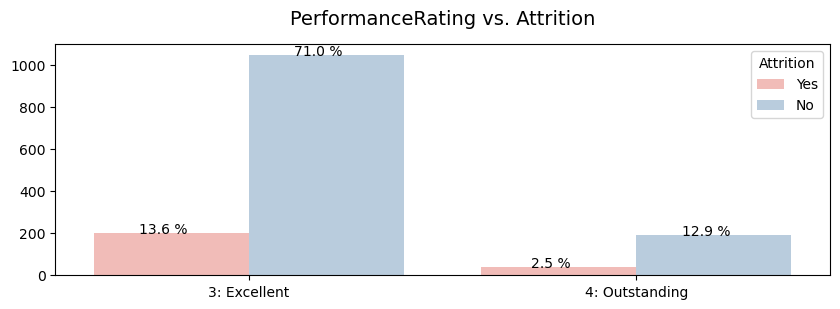

In [89]:
# Compare PerformanceRating vs Attrition
col = 'PerformanceRating'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['3: Excellent', '4: Outstanding'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05); 

The lowest attrition percentage(2.25%) corresponds to 4:outstandign for performance rating.

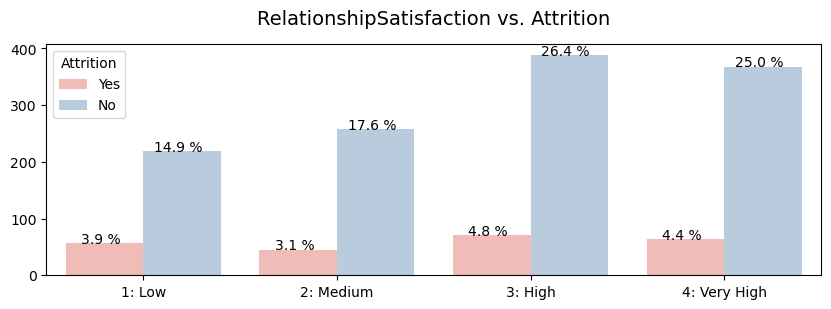

In [90]:
# Compare RelationshipSatisfaction vs Attrition
col = 'RelationshipSatisfaction'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Low', '2: Medium', '3: High', '4: Very High'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05); 

Attrition has similar values in all relationship satisfaction values, it seems that this feature does not have a major implication in the result.

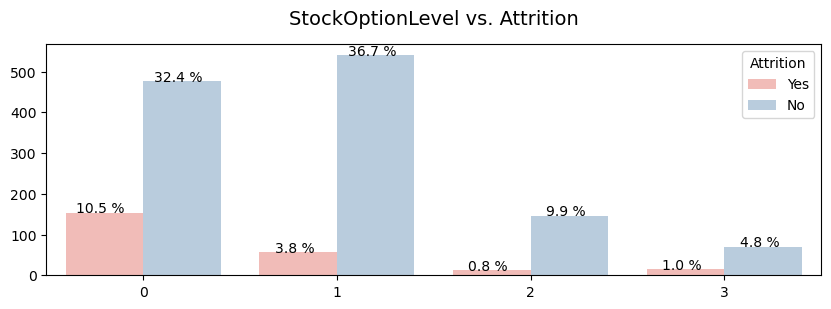

In [91]:
# Compare StockOptionLevel vs Attrition
col = 'StockOptionLevel'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The employees with 0 in the stock option level have the major attrition percentage of 10.5% in contrast with the more than 1 in the stock option level.

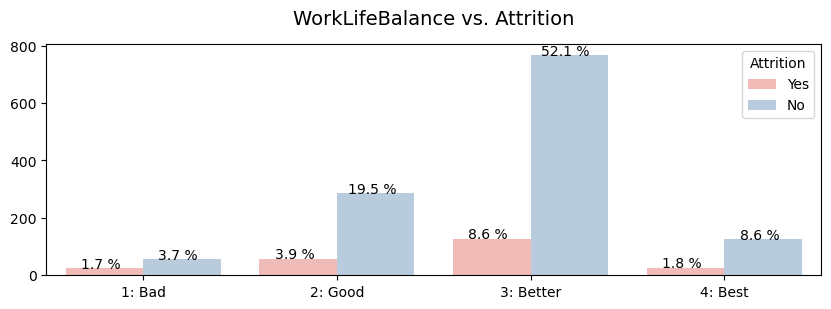

In [92]:
# Compare WorkLifeBalance vs Attrition
col = 'WorkLifeBalance'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Attrition', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1, 2, 3), ['1: Bad', '2: Good', '3: Better', '4: Best'], size=10)

plt.title(f"{col} vs. Attrition", size=14, y=1.05);

The major attrition percentage 8.6% corresponds to employees who qualified their work-life balance as 3:better.

### 1.4.3 Multivariate Analysis
#### 1.4.3.1 Pairplot


In order to appreciate the info obtained from pairplot the dataset was sliced. The pairplot with all columns at the same time does not proportionate much information.

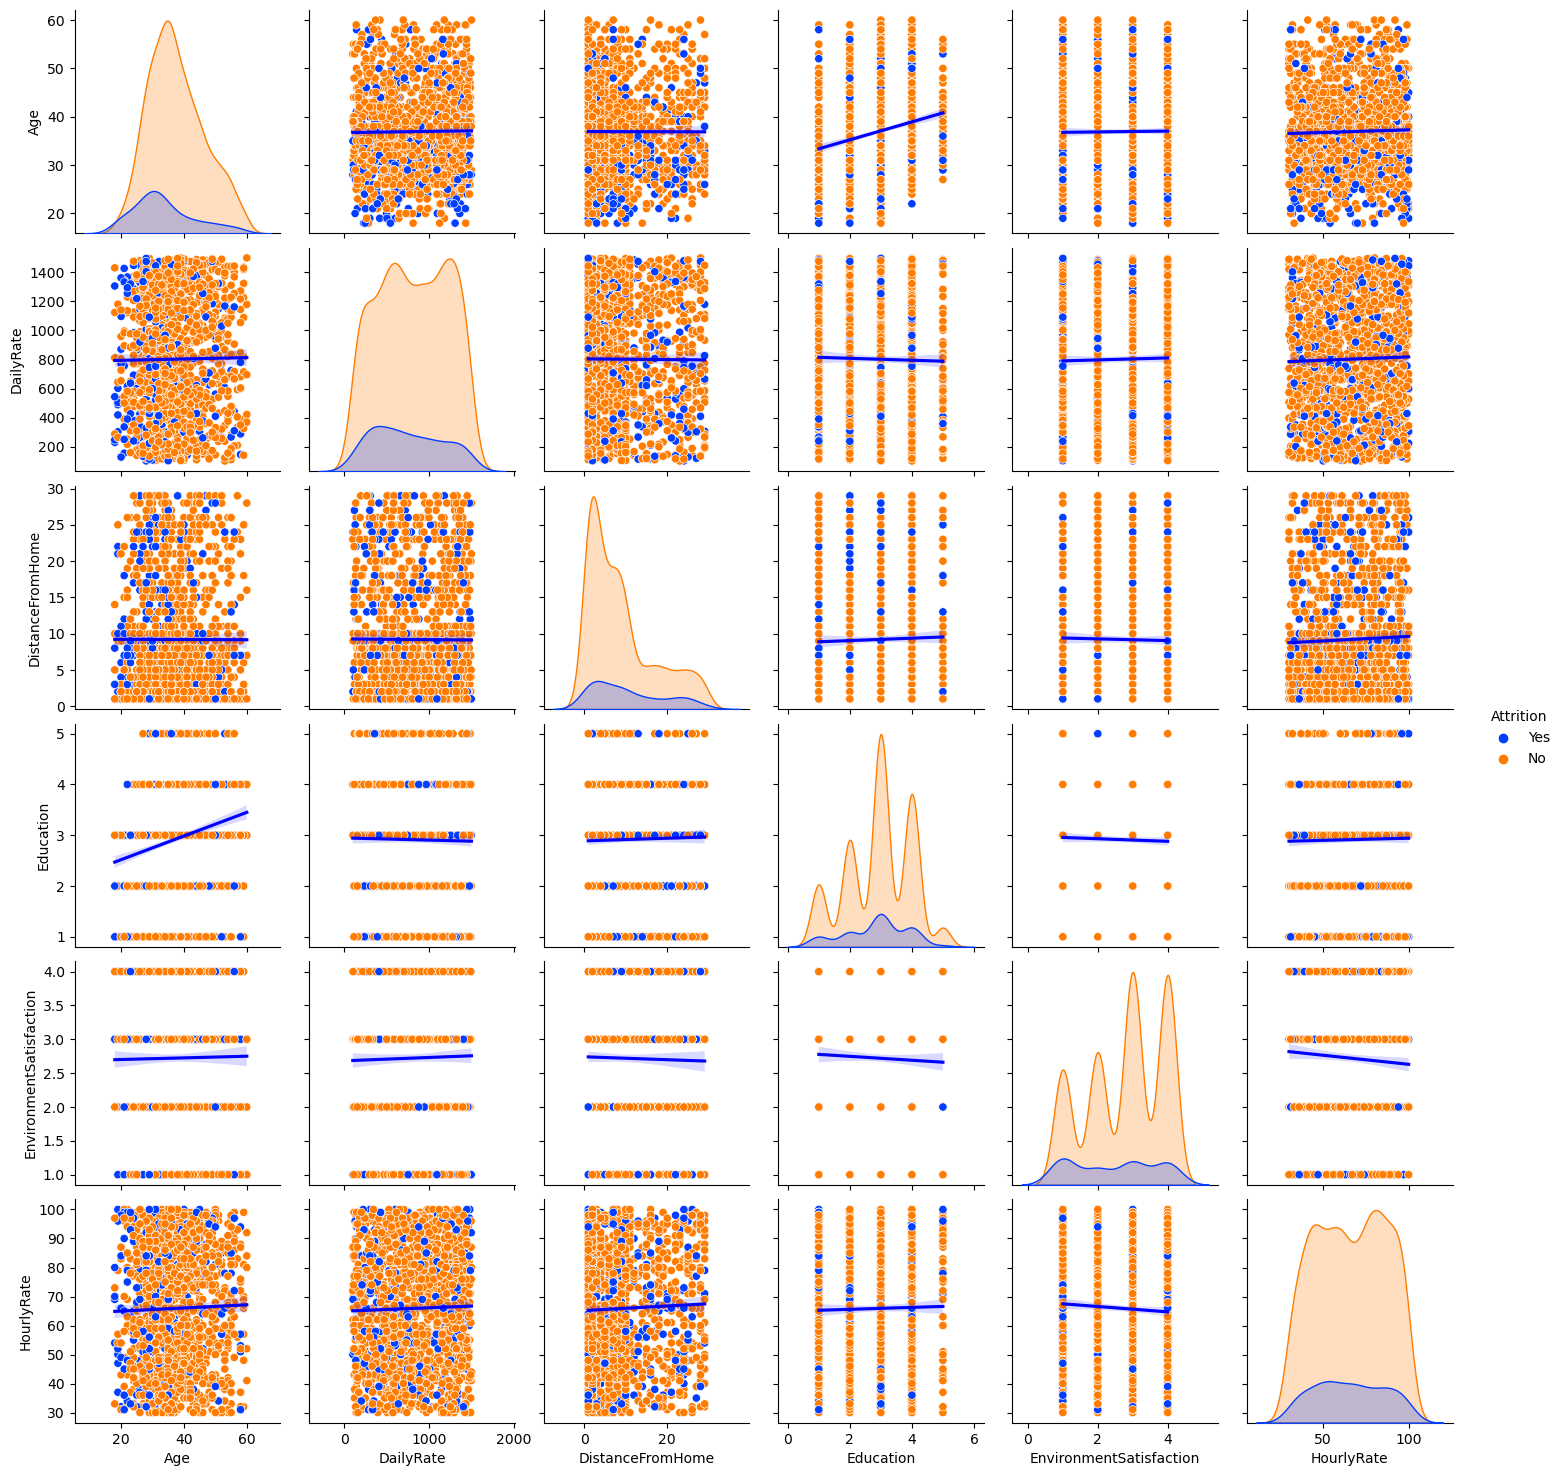

In [93]:
# First 10 columns
grid = sns.pairplot(df.iloc[:,:11], hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df.iloc[:,:11], x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive relations between Age and Education.

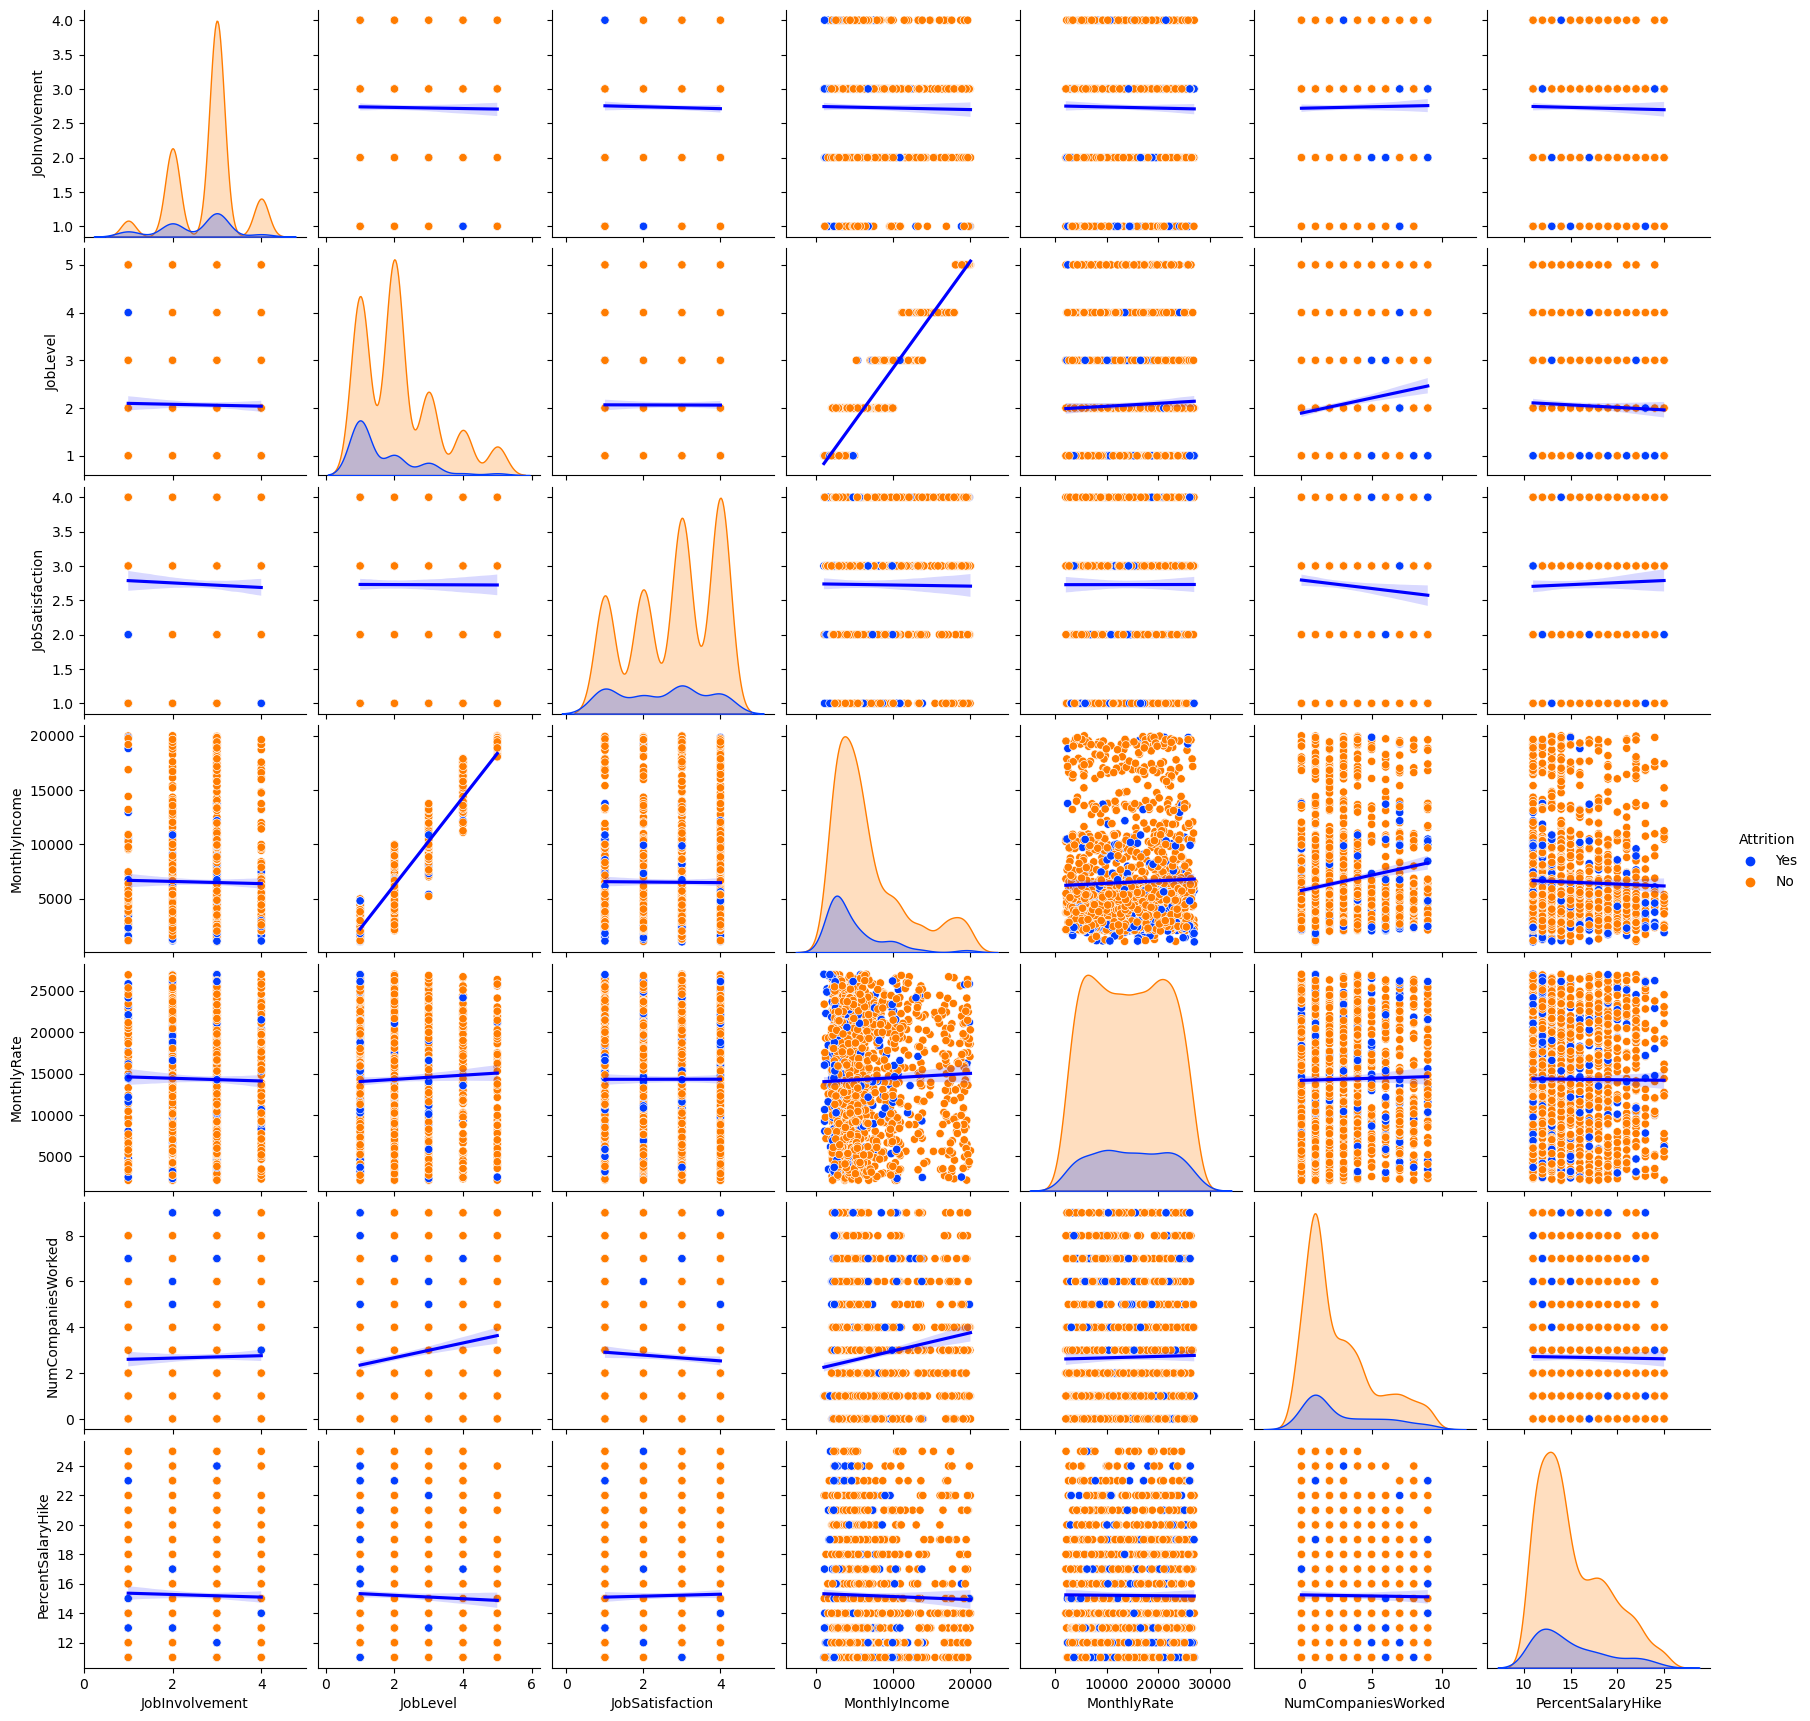

In [94]:
# Next 10 columns
df_pairplot = df.iloc[:,11:21]
df_pairplot['Attrition'] = df['Attrition']

grid = sns.pairplot(df_pairplot, hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_pairplot, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive relations between JobLevel and MonthlyIncome.

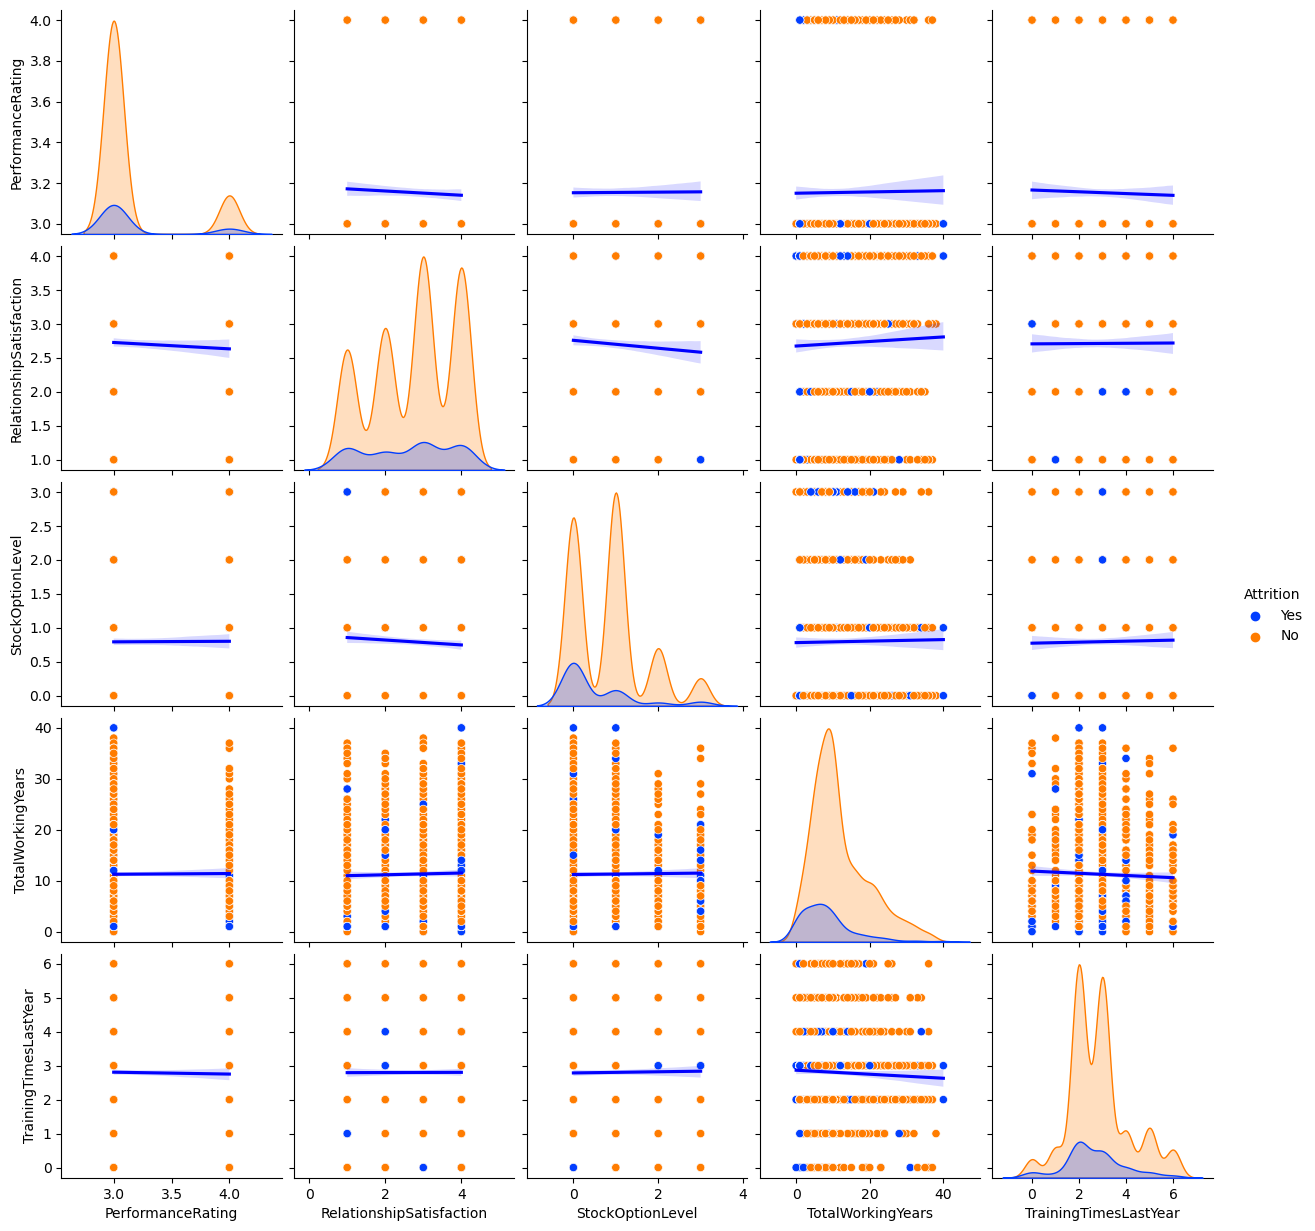

In [95]:
# Next 5 columns
df_pairplot = df.iloc[:,21:26]
df_pairplot['Attrition'] = df['Attrition']

grid = sns.pairplot(df_pairplot, hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_pairplot, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

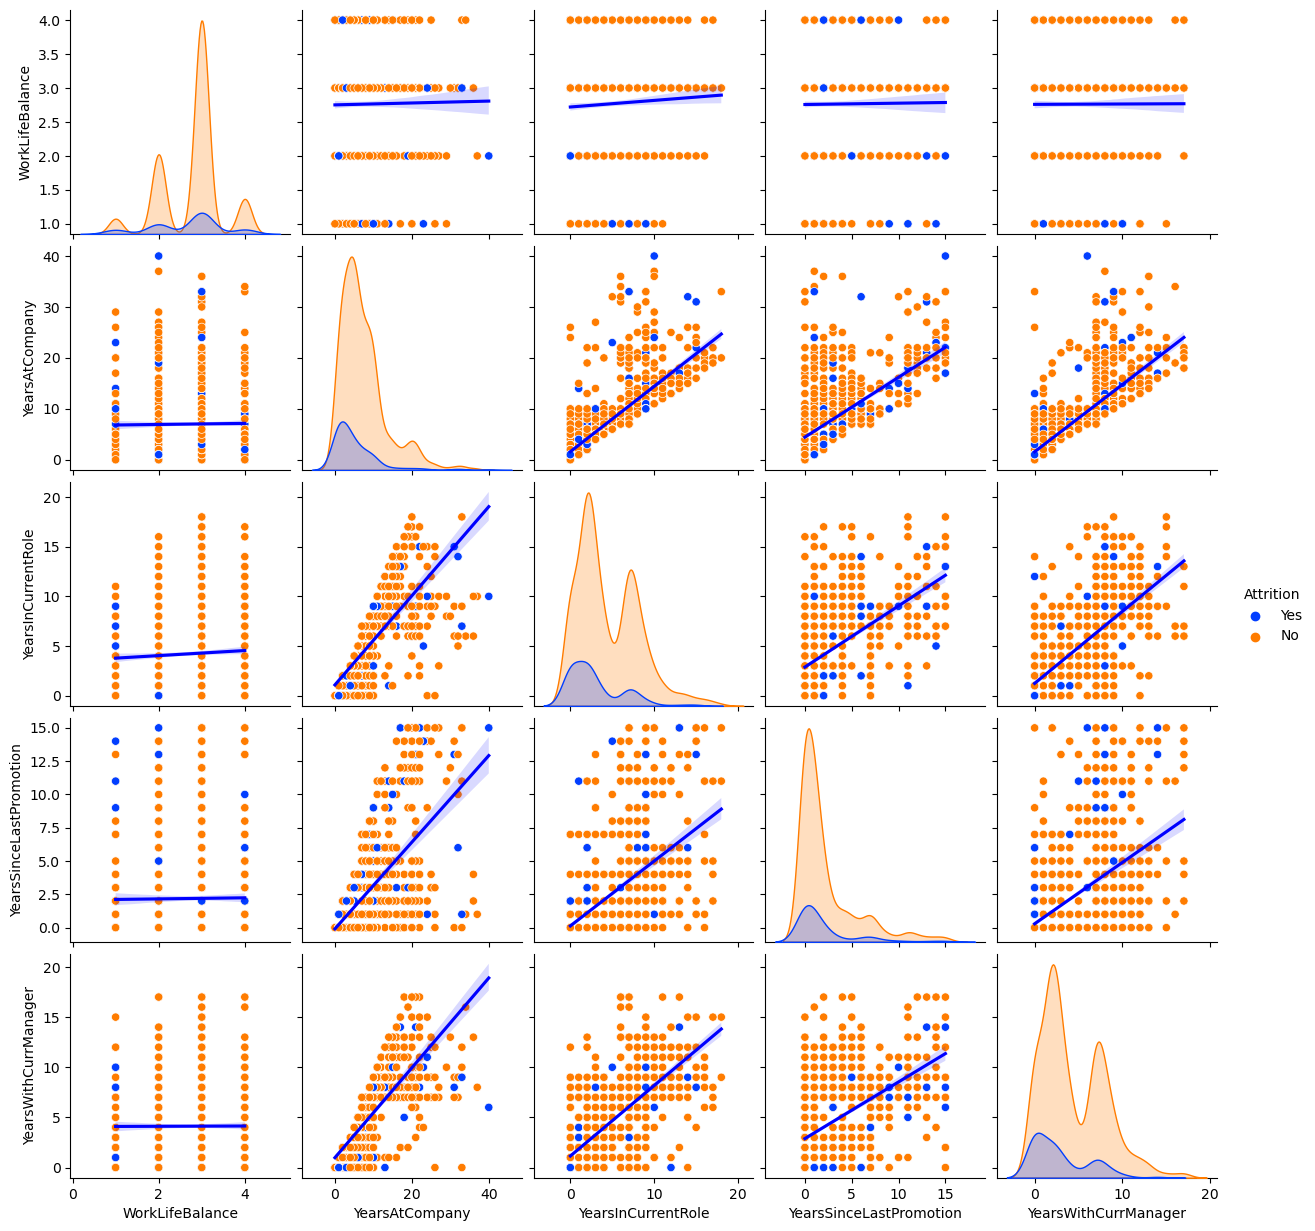

In [96]:
# Last columns
df_pairplot = df.iloc[:,26:]
df_pairplot['Attrition'] = df['Attrition']

grid = sns.pairplot(df_pairplot, hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_pairplot, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive correlation between YearsAtCompany, YearsInCurrentRole, YearsSinceLasPromotion and YearsCurrManager.

#### 1.4.3.2 Encoding the target variable

# BORRAR

In [98]:
df_backup = df.copy()

In [97]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [99]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

Now the label is encoded having values 1 for yes and 0 for no.

#### 1.4.3.2 Correlation between target variable and independent variables.

In [100]:
# Calculate the correlation between features
cor = df.corr()
cor

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.148280                -0.002693   -0.002334   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.069114                 0.001458   -0.019582   
YearsInCurrentRole         0.060236                 0.018007   -0.024106   
YearsSinceLastPromotion    0.054254                 0.016194   -0.026716   
YearsWithCurrManager       0.069065                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

In [101]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Attrition') ]

Feature A                 Feature B  Corr coef
12   Attrition                 Attrition   1.000000
101  Attrition          DistanceFromHome   0.077924
125  Attrition        NumCompaniesWorked   0.043494
221  Attrition               MonthlyRate   0.015170
296  Attrition         PerformanceRating   0.002889
377  Attrition                HourlyRate  -0.006846
406  Attrition         PercentSalaryHike  -0.013478
500  Attrition                 Education  -0.031373
507  Attrition   YearsSinceLastPromotion  -0.033019
531  Attrition  RelationshipSatisfaction  -0.045872
539  Attrition                 DailyRate  -0.056652
540  Attrition     TrainingTimesLastYear  -0.059478
543  Attrition           WorkLifeBalance  -0.063939
551  Attrition   EnvironmentSatisfaction  -0.103369
553  Attrition           JobSatisfaction  -0.103481
558  Attrition            JobInvolvement  -0.130016
561  Attrition            YearsAtCompany  -0.134392
563  Attrition          StockOptionLevel  -0.137145
565  Attrition      YearsWithCurrManager  -0.156199
566  Attrition                       Age  -0.159205
569  Attrition             MonthlyIncome  -0.159840
570  Attrition        YearsInCurrentRole  -0.160545
573  Attrition                  JobLevel  -0.169105
575  Attrition         TotalWorkingYears  -0.171063

The label has a weak positive correlation with DistanceFromHome, NumCompaniesWorked, MonthlyRate, and PerformanceRating. 
Also has a weak negative correlation with the rest of the features.

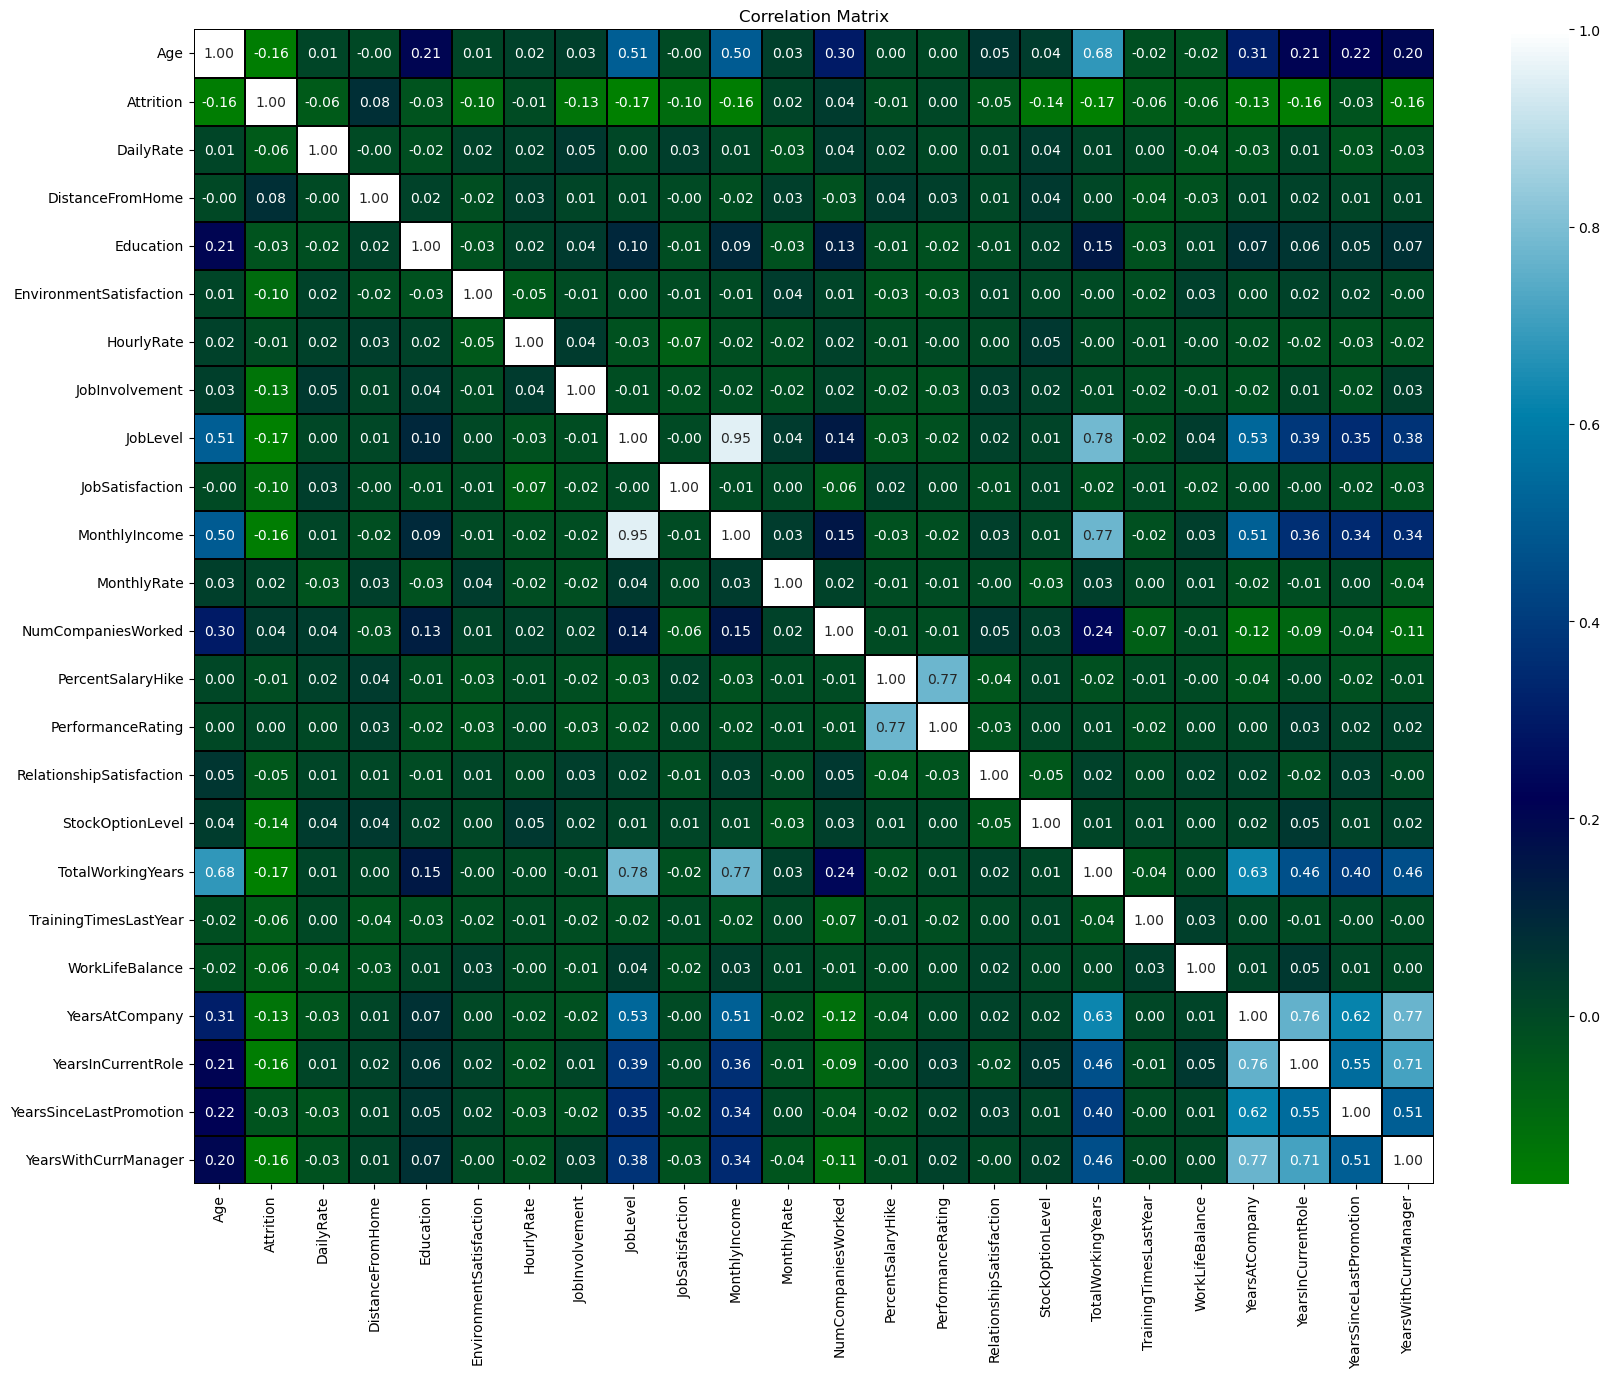

In [103]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='ocean', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

- This heatmap contains both positive and negative correlations.
- The target has more correlation with DistanceFromHome(+0.08)
- The target is negative correlated with TotalWorkingYears(-0.17)
- The column JobLevel is correlated with MonthlyIncome(+0.95), and TotalWorkingYears(+0.78)
- The column Age is positive correlated with TotalWorkingYears(+0.68)
- The columns YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, and TotalWorkingYears are correlated with each other. 

# 2. Preprocessing Data
## 2.1 Missing values

In Section 1.2 we verify that the dataset has no missing values.

In [106]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No missing values to remove.

## 2.2 Encoding Categorical features

Preprocessing the data to train the regression model. As we know the models understand numbers, so it is necessary to encode the categorical data, in our case the columns BusinessTravel,  Department,  EducationField,  Gender,  JobRole,  MaritalStatus, and OverTime. Attrition was encoded previously.

In [111]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}:\n {df[col].unique()}\n")

1.BusinessTravel:
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

2.Department:
 ['Sales' 'Research & Development' 'Human Resources']

3.EducationField:
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

4.Gender:
 ['Female' 'Male']

5.JobRole:
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

6.MaritalStatus:
 ['Single' 'Married' 'Divorced']

7.OverTime:
 ['Yes' 'No']



The columns wil be encodes manually as follows:
- BusinessTravel : (1=Non-Travel, 2=Travel_Frequently, 3=Travel_Rarely)
- Department : (1=Human Resources, 2=Research & Development', 3=Sales)
- EducationField : (1=Human Resources, 2=Life Sciences, 3=Marketing, 4=Medical, 5=Other, 6=Technical Degree)
- Gender : (1=Female, 2=Male)
- JobRole : (1=Healthcare Representative, 2=Human Resources, 3=Laboratory Technician, 4=Manager, 5=Manufacturing Director, 6=Research Director, 7= Research Scientist, 8=Sales Executive, 9=Sales Representative)
- MaritalStatus : (1=Divorced, 2=Married, 3=Single)
- OverTime : (1=No, 2=Yes)

In [119]:
# Encoding the features  
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3})
df['Department'] = df['Department'].map({'Human Resources': 1, 'Research & Development': 2, 'Sales': 3})
df['EducationField'] = df['EducationField'].map({'Human Resources': 1, 
                                                  'Life Sciences': 2, 
                                                  'Marketing': 3,
                                                  'Medical': 4, 
                                                  'Other': 5, 
                                                  'Technical Degree': 6})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})
df['JobRole'] = df['JobRole'].map({'Healthcare Representative': 1, 
                                    'Human Resources' : 2, 
                                    'Laboratory Technician' : 3, 
                                    'Manager' : 4, 
                                    'Manufacturing Director' : 5, 
                                    'Research Director' : 6, 
                                    'Research Scientist' : 7, 
                                    'Sales Executive' : 8, 
                                    'Sales Representative' : 9})
df['MaritalStatus'] = df['MaritalStatus'].map({'Divorced': 1, 'Married': 2, 'Single': 3})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

display(df.head())

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               3       1102           3                 1   
1   49          0               2        279           2                 8   
2   37          1               3       1373           2                 2   
3   33          0               2       1392           2                 3   
4   27          0               3        591           2                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               2                        2       1  ...   
1          1               2                        3       2  ...   
2          2               5                        4       2  ...   
3          4               2                        4       1  ...   
4          1               4                        1       2  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [120]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[1:]):
    print(f"{i+1}.{col}:\n {df[col].unique()}\n")

1.BusinessTravel:
 [3 2 1]

2.Department:
 [3 2 1]

3.EducationField:
 [2 5 4 3 6 1]

4.Gender:
 [1 2]

5.JobRole:
 [8 7 3 5 1 4 9 6 2]

6.MaritalStatus:
 [3 2 1]

7.OverTime:
 [1 0]



All the categorical features were encoded.

## 2.3  Removing outliers
We apply zscore to detect the outliers 

In [121]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0             1.010909   0.891688        0.937414                 0.660531   
1             0.147150   1.868426        0.937414                 0.254625   
2             0.887515   0.891688        1.316673                 1.169781   
3             0.764121   1.061787        0.937414                 1.169781   
4             0.887515   1.868426        0.565311                 1.575686   
...                ...        ...             ...                      ...   
1465          1.703764   0.891688        0.565311                 0.254625   
1466          0.393938   1.868426        0.565311                 1.169781   
1467          0.640727   0.085049        0.937414                 0.660531   
1468          0.887515   0.085049        0.565311                 1.169781   
1469          0.147150   0.085049        0.565311                 0.660531   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     1.224745  ...           0.426230                  1.584178   
1     0.816497  ...           2.346151                  1.191438   
2     0.816497  ...           0.426230                  0.658973   
3     1.224745  ...           0.426230                  0.266233   
4     0.816497  ...           0.426230                  1.191438   
...        ...  ...                ...                       ...   
1465  0.816497  ...           0.426230                  0.266233   
1466  0.816497  ...           0.426230                  1.584178   
1467  0.816497  ...           2.346151                  0.658973   
1468  0.816497  ...           0.426230                  1.191438   
1469  0.816497  ...           0.426230                  1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.932014           0.421642               2.171982   
1             0.241988           0.164511               0.155707   
2             0.932014           0.550208               0.155707   
3             0.932014           0.421642               0.155707   
4             0.241988           0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988           0.293077               1.707500   
1467          0.241988           0.678774               2.171982   
1468          0.932014           0.735447               0.155707   
1469          0.932014           0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            2.493820        0.164613            0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096        1.144294            1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096        0.817734            0.615492   
...               ...             ...                 ...   
1465         0.338096        0.327893            0.615492   
1466         0.338096        0.001333            0.764998   
1467         0.338096        0.164613            0.615492   
1468         

In [123]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process

83 rows with outliers were deleted.
This represent 5.65% of the data.
In the new dataset there are 1387 rows and 31 columns.


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               3       1102           3                 1   
1      49          0               2        279           2                 8   
2      37          1               3       1373           2                 2   
3      33          0               2       1392           2                 3   
4      27          0               3        591           2                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               2        884           2                23   
1466   39          0               3        613           2                 6   
1467   27          0               3        155           2                 4   
1468   49          0               2       1023           3                 2   
1469   34          0               3        628           2                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               2                        2       1  ...   
1             1               2                        3       2  ...   
2             2               5                        4       2  ...   
3             4               2                        4       1  ...   
4             1               4                        1       2  ...   
...         ...             ...                      ...     ...  ...   
1465          2               4                        3       2  ...   
1466          1               4                        4       2  ...   
1467          3               2                        2       2  ...   
1468          3               4                        4       2  ...   
1469          3               4                        2       2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

The outlier removal must be done only on the training set to preserve the integrity of the test data.

## 2.4 Skewness Correction


In [124]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
PerformanceRating         1.931566
Attrition                 1.805983
YearsSinceLastPromotion   1.756335
MonthlyIncome             1.544770
YearsAtCompany            1.248623
JobLevel                  1.126075
NumCompaniesWorked        1.037715
TotalWorkingYears         1.034487
StockOptionLevel          0.962332
DistanceFromHome          0.954752
OverTime                  0.954751
PercentSalaryHike         0.800592
YearsInCurrentRole        0.726675
YearsWithCurrManager      0.694506
TrainingTimesLastYear     0.577614
EducationField            0.544868
Age                       0.472280
Department                0.183919
MonthlyRate               0.030596
DailyRate                -0.017078
HourlyRate               -0.030481
MaritalStatus            -0.160952
Education                -0.289024
RelationshipSatisfaction -0.295686
EnvironmentSatisfaction  -0.325285
JobSatisfaction          -0.345612
JobRole                  -0.386843
Gender                   -0.417296
JobInvolvement           -0.501401
WorkLifeBalance          -0.557100
BusinessTravel           -1.426774

In [125]:
# Subsetting the features with a skew > 0.5
df_skew[(df_skew['Skew'] > 0.5) | (df_skew['Skew'] < -0.5)]

Skew
PerformanceRating        1.931566
Attrition                1.805983
YearsSinceLastPromotion  1.756335
MonthlyIncome            1.544770
YearsAtCompany           1.248623
JobLevel                 1.126075
NumCompaniesWorked       1.037715
TotalWorkingYears        1.034487
StockOptionLevel         0.962332
DistanceFromHome         0.954752
OverTime                 0.954751
PercentSalaryHike        0.800592
YearsInCurrentRole       0.726675
YearsWithCurrManager     0.694506
TrainingTimesLastYear    0.577614
EducationField           0.544868
JobInvolvement          -0.501401
WorkLifeBalance         -0.557100
BusinessTravel          -1.426774

Considering the skewness of the continuous numerical columns:

- MonthlyIncome	(1.544770)

is greater than 0.5 or lower than -0.5, we are going to apply methods to remove it. The other features are not considered since they are categorical or discrete.

In [144]:
# Checking skewness using cuberoot method and log method
skew_columns = ['MonthlyIncome']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [145]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

Skewness
MonthlyIncome_sqrt  0.950248
MonthlyIncome_log   0.318593
MonthlyIncome_cbrt  0.742985
MonthlyIncome       1.544770

After comparing the resulting skewness, we are going to apply the log method for the MonthlyIncome feature.

In [146]:
# Log transformation
df_process['MonthlyIncome'] = np.log(df_process['MonthlyIncome'])

df_process.skew().sort_values(ascending=False).to_frame("Skewness after transform")

Skewness after transform
PerformanceRating                         1.931566
Attrition                                 1.805983
YearsSinceLastPromotion                   1.756335
YearsAtCompany                            1.248623
JobLevel                                  1.126075
NumCompaniesWorked                        1.037715
TotalWorkingYears                         1.034487
StockOptionLevel                          0.962332
DistanceFromHome                          0.954752
OverTime                                  0.954751
PercentSalaryHike                         0.800592
YearsInCurrentRole                        0.726675
YearsWithCurrManager                      0.694506
TrainingTimesLastYear                     0.577614
EducationField                            0.544868
Age                                       0.472280
MonthlyIncome                             0.318593
Department                                0.183919
MonthlyRate                               0.030596
DailyRate                                -0.017078
HourlyRate                               -0.030481
MaritalStatus                            -0.160952
Education                                -0.289024
RelationshipSatisfaction                 -0.295686
EnvironmentSatisfaction                  -0.325285
JobSatisfaction                          -0.345612
JobRole                                  -0.386843
Gender                                   -0.417296
JobInvolvement                           -0.501401
WorkLifeBalance                          -0.557100
BusinessTravel                           -1.426774

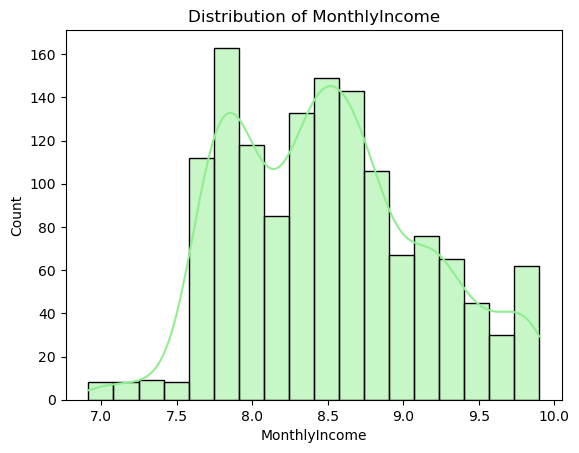

In [149]:
# Visualizing the distribution of the columns after removing skewness
column = 'MonthlyIncome'
sns.histplot(data=df_process, x=column, kde=True, color='lightgreen')
plt.title(f"Distribution of {column}")

plt.show()

After transform the dataset, we can continue with the analysis.

## 2.5 Feature Scaling using Standard Scalarization


### 2.5.1 Separating features and label
The training data is in df_process dataset, and the testing data is in df_test.

In [150]:
# Separating the independent and target variables into x and y 
x = df_process.drop('Attrition', axis=1)
y = df_process['Attrition']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (1387, 30)
Label Dimension = (1387,)


### 2.5.2 Scaling
The scaling must be applied to testing data also.

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.536681        0.593126   0.734325    1.405373         -1.011249   
1  1.442111       -0.905354  -1.307769   -0.496337         -0.145521   
2  0.083966        0.593126   1.406752   -0.496337         -0.887573   
3 -0.368749       -0.905354   1.453896   -0.496337         -0.763898   
4 -1.047821        0.593126  -0.533609   -0.496337         -0.887573   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.876177       -0.940815                -0.665328 -1.229911    1.388670   
1  -1.853858       -0.940815                 0.251978  0.813067   -0.239091   
2  -0.876177        1.305159                 1.169285  0.813067    1.290017   
3   1.079185       -0.940815                 1.169285 -1.229911   -0.485721   
4  -1.853858        0.556501                -1.582635  0.813067   -1.274939   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...          -0.424765                 -1.575817         -0.929427   
1  ...           2.354241                  1.199034          0.238250   
2  ...          -0.424765                 -0.650866         -0.929427   
3  ...          -0.424765                  0.274084         -0.929427   
4  ...          -0.424765                  1.199034          0.238250   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.343728              -2.171420        -2.501172       -0.022350   
1          -0.045106               0.151871         0.336558        0.832812   
2          -0.493039               0.151871         0.336558       -1.305094   
3          -0.343728               0.151871         0.336558        0.405231   
4          -0.642351               0.151871         0.336558       -0.877513   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.040903                -0.710699              0.368270  
1            0.965895                -0.310480              0.982200  
2           -1.192419                -0.710699             -1.166556  
3            0.965895                 0.489958             -1.166556  
4           -0.575758                 0.089739             -0.552626  

[5 rows x 30 columns]

We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

## 2.6 Muticollinearity Analysis and Feature Selection

### 2.6.1 Checking Variance Inflation Factor (VIF)


In [153]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
11                  JobLevel    7.065573
15             MonthlyIncome    6.268099
26            YearsAtCompany    4.887712
23         TotalWorkingYears    3.810616
29      YearsWithCurrManager    3.312577
27        YearsInCurrentRole    3.022929
19         PercentSalaryHike    2.482907
20         PerformanceRating    2.478154
3                 Department    2.044466
12                   JobRole    1.974373
0                        Age    1.849104
14             MaritalStatus    1.839781
22          StockOptionLevel    1.821346
28   YearsSinceLastPromotion    1.436179
17        NumCompaniesWorked    1.272310
5                  Education    1.063194
18                  OverTime    1.028906
2                  DailyRate    1.028834
24     TrainingTimesLastYear    1.028070
7    EnvironmentSatisfaction    1.024684
8                     Gender    1.023577
13           JobSatisfaction    1.022557
6             EducationField    1.021451
9                 HourlyRate    1.021404
21  RelationshipSatisfaction    1.020553
10            JobInvolvement    1.018533
16               MonthlyRate    1.017855
25           WorkLifeBalance    1.017618
4           DistanceFromHome    1.015083
1             BusinessTravel    1.014129

As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). Infinite values correspond to categorical features. We can continue with model building.

Now we are going to balance the dataset and then move ahead from model building.

## 2.7 Balancing the Dataset

As we see previously in the Section 1.4.1.1. The dataset is imbalance: 1233 (83.9%) records for "no" and only 237 (16.1%) records as "yes". So, we are going to apply SMOTE for oversampling the data. 


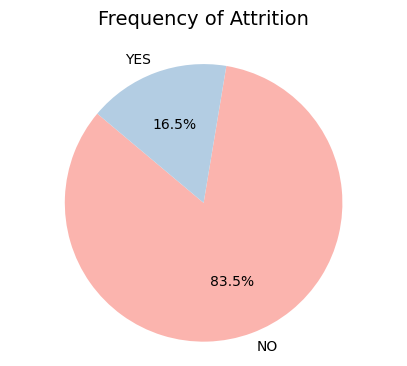

In [154]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Attrition", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [155]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

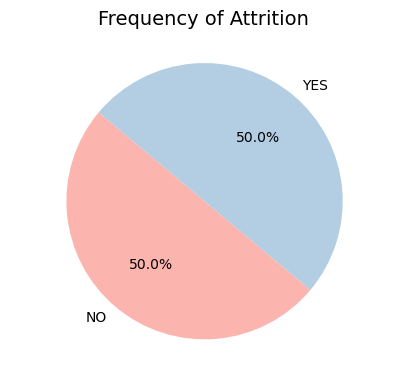

In [156]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Attrition", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [157]:
X = x1
Y = y1

Since the data is balanced, we can build machine learning classification models.

# 3. Modeling


## 3.1 Finding the best random state

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [159]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9612 at random_state 68
Wall time: 1min 6s


Best accuracy is 96.12% at random_state 68

## 3.2 Creating train test split

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (1621, 30)
x_test shape:   (695, 30)
y_train shape:  (1621,)
y_test shape:   (695,)


## 3.3 Classification Algorithms¶

In [161]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [162]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [163]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}
    

### 3.3.1 RandomForestClassifier

In [164]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[346  14]
 [ 22 313]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       360
           1       0.96      0.93      0.95       335

    accuracy                           0.95       695
   macro avg       0.95      0.95      0.95       695
weighted avg       0.95      0.95      0.95       695

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 94.82%
Wall time: 398 ms


### 3.3.2 Extra Trees Classifier

In [165]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[345  15]
 [  9 326]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       360
           1       0.96      0.97      0.96       335

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 96.55%
Wall time: 280 ms


### 3.3.3 Logistic Regression

In [166]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[275  85]
 [ 69 266]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       360
           1       0.76      0.79      0.78       335

    accuracy                           0.78       695
   macro avg       0.78      0.78      0.78       695
weighted avg       0.78      0.78      0.78       695

Training Accuracy using LogisticRegression is 80.38%
The accuracy score using LogisticRegression is 77.84%
Wall time: 52.9 ms


### 3.3.4 Support Vector Machine Classifier

In [167]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[322  38]
 [ 25 310]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       360
           1       0.89      0.93      0.91       335

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695

Training Accuracy using SVC is 95.81%
The accuracy score using SVC is 90.94%
Wall time: 356 ms


### 3.3.5 Gradient Boosting Classifier

In [168]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[342  18]
 [ 26 309]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       360
           1       0.94      0.92      0.93       335

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695

Training Accuracy using GradientBoostingClassifier is 97.29%
The accuracy score using GradientBoostingClassifier is 93.67%
Wall time: 687 ms


### 3.3.6 AdaBoost Classifier

In [169]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[314  46]
 [ 19 316]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       360
           1       0.87      0.94      0.91       335

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695

Training Accuracy using AdaBoostClassifier is 91.18%
The accuracy score using AdaBoostClassifier is 90.65%
Wall time: 261 ms


### 3.3.7 Bagging Classifier

In [170]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[330  30]
 [ 33 302]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       360
           1       0.91      0.90      0.91       335

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695

Training Accuracy using BaggingClassifier is 99.01%
The accuracy score using BaggingClassifier is 90.94%
Wall time: 165 ms


## 3.4 Comparing models

### 3.4.1 Comparing accuracy of each model

In [171]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

id  \
1        ExtraTreesClassifier   
0      RandomForestClassifier   
4  GradientBoostingClassifier   
3                         SVC   
6           BaggingClassifier   
5          AdaBoostClassifier   
2          LogisticRegression   

                                               Model  Training Accuracy  \
1  (ExtraTreeClassifier(random_state=1882801434),...           1.000000   
0  (DecisionTreeClassifier(max_features='auto', r...           1.000000   
4  ([DecisionTreeRegressor(criterion='friedman_ms...           0.972856   
3                                              SVC()           0.958051   
6  (DecisionTreeClassifier(random_state=479530037...           0.990130   
5  (DecisionTreeClassifier(max_depth=1, random_st...           0.911783   
2                               LogisticRegression()           0.803825   

   Model Accuracy Score  
1              0.965468  
0              0.948201  
4              0.936691  
3              0.909353  
6              0.909353  
5              0.906475  
2              0.778417

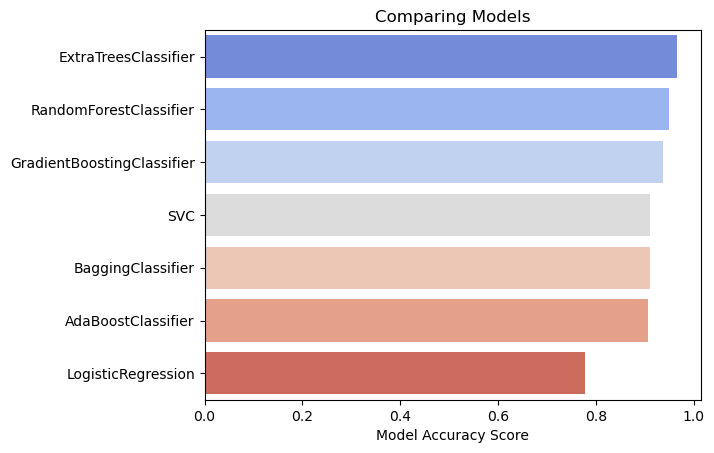

In [180]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='coolwarm')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

The model with the best accuracy is ExtraTreesClassifier with 96.55% of accuracy.

### 3.4.2 Cross validation score
In order to evaluate the performance of the models we are going to user Cross-validation technique.

In [181]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [182]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [183]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    


::: Model: RandomForestClassifier::: 
score:[0.75431034 0.98272138 0.97192225 0.96544276 0.98056156]
Score mean: 0.9310
Difference between Accuracy score and cross validation score is 0.0172

::: Model: ExtraTreesClassifier::: 
score:[0.93318966 0.97408207 0.9762419  0.96544276 0.98056156]
Score mean: 0.9659
Difference between Accuracy score and cross validation score is -0.0004

::: Model: LogisticRegression::: 
score:[0.80172414 0.77969762 0.79913607 0.77969762 0.79265659]
Score mean: 0.7906
Difference between Accuracy score and cross validation score is -0.0122

::: Model: SVC::: 
score:[0.90517241 0.93520518 0.92656587 0.91792657 0.91144708]
Score mean: 0.9193
Difference between Accuracy score and cross validation score is -0.0099

::: Model: GradientBoostingClassifier::: 
score:[0.57543103 0.96328294 0.96112311 0.94384449 0.96544276]
Score mean: 0.8818
Difference between Accuracy score and cross validation score is 0.0549

::: Model: AdaBoostClassifier::: 
score:[0.625      0.941

In [184]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

Model  \
id                                                                              
ExtraTreesClassifier        (ExtraTreeClassifier(random_state=1882801434),...   
RandomForestClassifier      (DecisionTreeClassifier(max_features='auto', r...   
GradientBoostingClassifier  ([DecisionTreeRegressor(criterion='friedman_ms...   
SVC                                                                     SVC()   
BaggingClassifier           (DecisionTreeClassifier(random_state=479530037...   
AdaBoostClassifier          (DecisionTreeClassifier(max_depth=1, random_st...   
LogisticRegression                                       LogisticRegression()   

                            Training Accuracy  Model Accuracy Score  \
id                                                                    
ExtraTreesClassifier                 1.000000              0.965468   
RandomForestClassifier               1.000000              0.948201   
GradientBoostingClassifier           0.972856              0.936691   
SVC                                  0.958051              0.909353   
BaggingClassifier                    0.990130              0.909353   
AdaBoostClassifier                   0.911783              0.906475   
LogisticRegression                   0.803825              0.778417   

                            CV score mean  Diff Acc and cv score  
id                                                                
ExtraTreesClassifier             0.965904              -0.000436  
RandomForestClassifier           0.930992               0.017210  
GradientBoostingClassifier       0.881825               0.054866  
SVC                              0.919263              -0.009911  
BaggingClassifier                0.904654               0.004699  
AdaBoostClassifier               0.876188               0.030287  
LogisticRegression               0.790582              -0.012165

After applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier and the difference with accuracy score is -0.000436 confirming as follows:

**ExtraTreesClassifier is our best Model**

## 3.5 Hyper Parameter Tuning
### 3.5.1 Finding the best parameters for ExtraTreesClassifier

In [185]:
random_state

68

In [186]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [187]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = ExtraTreesClassifier()

In [188]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

Wall time: 3min 29s


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [68, 10, 50, 1000]})

In [189]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

Best Parameters for ExtraTreesClassifier model:


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

These are the best parameters for training the model.

In [190]:
best_model

ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=300,
                     n_jobs=-2, random_state=50)

## 3.6 Final Model

In [191]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'entropy', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 50)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 96.4%


The accuracy for the final model is 96.4%

## 3.6.1 Plotting ROC and compare AUC for all the models used

In [192]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

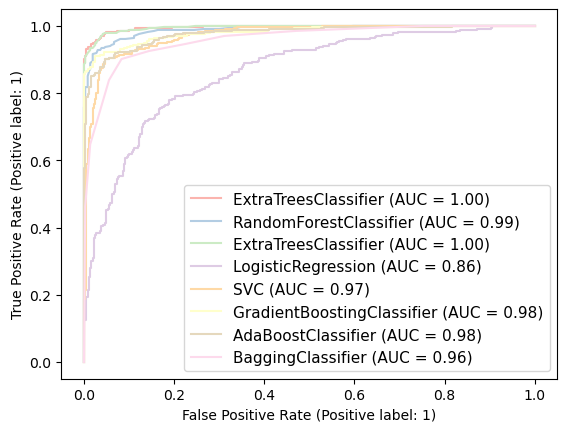

In [193]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

# First Plot ROC Curve from Best Model
plot_roc_curve(best_model, x_test, y_test, ax=ax)

# Plot each ROC Curve from each model 
for id_model, model in models.items(): 
    plot_roc_curve(model, x_test, y_test, ax=ax)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see area under curve for each model used. The  red one is the best model **ExtraTreesClassifier**.

### 3.6.2 Plotting ROC and compare AUC for  the best model 

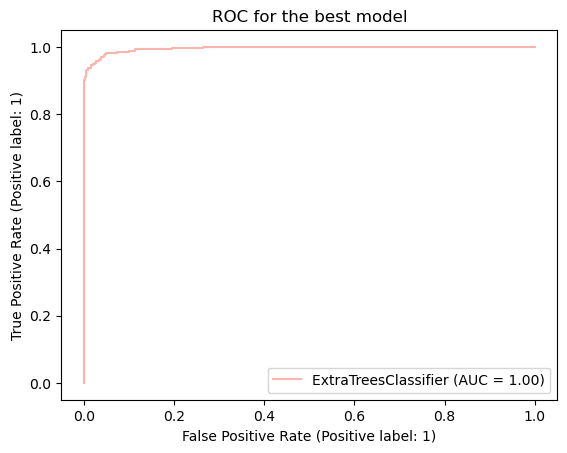

In [194]:
# Let's check the AUC for the best model after hyer parameter tuning
plot_roc_curve(best_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show() 

### 3.6.3 Saving the model

In [195]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/HR_Attrition_model.pkl")

['models/HR_Attrition_model.pkl']

### 3.6.4  Predicting the saved model

In [196]:
# Lets load the saved model and get the predictions
model = joblib.load("models/HR_Attrition_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 96.403 %


0    1    2    3    4    5    6    7    8    9    ...  685  686  \
Predicted    0    0    0    0    1    1    1    0    1    1  ...    0    1   
Original     0    0    0    0    1    1    1    0    1    1  ...    0    1   

           687  688  689  690  691  692  693  694  
Predicted    0    1    0    0    1    0    0    0  
Original     0    1    0    0    1    0    0    0  

[2 rows x 695 columns]

These are the predicted values in the fraction of the dataset we appart for testing to compare the prediction with accuracy of 96.403%.

**Final Conclusions:**
- The given dataset consists of 35 columns, however, we are doing uni-variate analysis only on 31 features because the columns EmployeeNumber, EmployeeCount, Over18, and StandardHours do not give much information for prediction and they were dropped.
- The best model was ExtraTreesClassifier with accuracy_score: 96.55% 
- Eliminating the outliers represented the elimination of 5.65% of the total records (83 rows).

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga